 <h1 align="center">Исследовательский анализ рынка общественного питания Москвы</h1> 

Автор: Стукалов Артем Витальевич  
Дата: 18.12.2025

## <a id="content">Содержание:</a>

[Введение в проект](#introduction)  
[Часть 1. Загрузка и знакомство с данными](#part1)  
[Часть 2. Предобработка данных](#part2)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.1. Изучение корректности типов данных](#part2.1)   
&nbsp;&nbsp;&nbsp;&nbsp;[2.2. Проверяем наличие пропусков в данных](#part2.2)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.3. Явные и неявные дубликаты в данных](#part2.3)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.4. Создание нового столбца is_24_7](#part2.4)  
&nbsp;&nbsp;&nbsp;&nbsp;[Вывод по проверке ошибок в данных и их предобработке](#conslusion2)  
[Часть 3. Исследовательский анализ данных](#part3)  
&nbsp;&nbsp;&nbsp;&nbsp;[3.1. Исследование количества объектов общественного питания по каждой категории.](#part3.1)   
&nbsp;&nbsp;&nbsp;&nbsp;[3.2. Исследование распределения количества заведений по административным районам Москвы, а также изучение распределения заведений каждой категории в Центральном административном округе Москвы.](#part3.2)  
&nbsp;&nbsp;&nbsp;&nbsp;[3.3. Изучение соотношения сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.](#part3.3)   
&nbsp;&nbsp;&nbsp;&nbsp;[3.4. Исследование количества посадочных мест в заведениях общественного питания.](#part3.4)  
&nbsp;&nbsp;&nbsp;&nbsp;[3.5. Исследование рейтинга заведений общественного питания.](#part3.5)   
&nbsp;&nbsp;&nbsp;&nbsp;[3.6. Изучение матрицы корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным.](#part3.6)  
&nbsp;&nbsp;&nbsp;&nbsp;[3.7.  Исследование топ-15 популярных сетей в Москве.](#part3.7)   
&nbsp;&nbsp;&nbsp;&nbsp;[3.8. Изучение вариации среднего чека заведения в зависимости от района Москвы.¶](#part3.8)  
&nbsp;&nbsp;&nbsp;&nbsp;[Вывод по исследовательскому анализу данных](#conslusion3)  
[Итоговый вывод](#common_conclusion)

## <a id='introduction'>Введение в проект</a>

### Цель и задачи
**Цель проекта** - провести исследовательский анализ рынка общественного питания Москвы.

**Задачи проекта:**
- Загрузить данные и познакомиться с их содержимым;
- Провести предобработку данных;
- Провести исследовательский анализ данных;
- Сформулировать итоговый вывод и составить рекомендации на основе проведенного анализа.

### Описание данных

Для анализа поступил датасет о заведениями общественного питания Москвы, составленные на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Данные состоят из двух датасетов:

rest_info.csv — информация о заведениях общественного питания;  
rest_price.csv — информацию о среднем чеке в заведениях общественного питания.

#### Описание датасета rest_info

Файл /datasets/rest_info.csv содержит информацию о заведениях общественного питания:
- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение, например Центральный административный округ;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
  - 0 — заведение не является сетевым;
  - 1 — заведение является сетевым.
- seats — количество посадочных мест.

#### Описание датасета rest_price

Файл /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания:
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — хранит среднюю стоимость заказа в виде диапазона, например:
  - «Средний счёт: 1000–1500 ₽»;
  - «Цена чашки капучино: 130–220 ₽»;
  - «Цена бокала пива: 400–600 ₽».  
и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

## <a id='part1'>Часть 1. Загрузка и знакомство с данными</a>

[Вернуться к содержанию](#content)

Импортируем основные библиотеки для дальнейшего анализа данных

In [1]:
import pandas as pd # Импортируем библиотеку pandas

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

Сохраним данные датасетов в двух переменных: rest_info и rest_price.

In [2]:
# Выгружаем данные в переменные rest_info и rest_price
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv') # Выгружаем данные из датасета rest_info.csv
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv') # Выгружаем данные из датасета rest_price.csv

**Познакомимся с данными датасета rest_info.csv - выведем первые строки методом head(), а информацию о датафрейме методом info()**

In [3]:
# Выводим первые строки датасета
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выводим информацию о датасета
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Посмотрим в каких столбцах встречаются пропуски в датасете rest_info.csv

In [5]:
rest_info.isna().sum() # считаем количество пропусков в каждом столбце

id             0
name           0
category       0
address        0
district       0
hours        536
rating         0
chain          0
seats       3611
dtype: int64

Посчитаем общее количество пропусков в датасете rest_info.csv

In [6]:
rest_info.isna().sum().sum()

np.int64(4147)

#### После первичного анализа датасета rest_info.csv можно сделать следующие выводы:
- Датасет rest_info.csv содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.
- Значения в столбцах соответствуют своему описанию
- Названия столбцов представлены в едином стиле и соответствуют стилю snake case.
- Датафрейм rest_info.csv содержит следующие типы данных для каждого столбца:
  - 6 строковых столбцов (object): id, name, category, address, district, hours
  - 2 числовых столбца (float64): rating, seats
  - 1 числовой столбец (int64): chain
- Поскольку столбец rating представлен дробным число от 0 до 5, в таком случае размерность этих данных можно оптимизировать, понизив разрядность float64 до float32
- Поскольку столбец chain имеет всего лишь два целочисленных бинарных значения, в таком случае для него рекомендовано понизить разрядность
- Поскольку столбец seats представлен целочисленным числом, в таком случае следует изменить тип данных с float на integer, при этом понизив разрядность для оптимизации
- В датасете есть пропущенные значения, которые встречаются в столбцах hours и seats. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Общее количество пропусков в датасете rest_info.csv: 4147.

**Теперь познакомимся с данными датасета rest_price.csv**

In [7]:
# Выводим первые строки датасета
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [8]:
# Выводим информацию о датасете
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Посмотрим в каких столбцах встречаются пропуски в датасете rest_price.csv

In [9]:
col_with_spaces=rest_price.isna().sum() # считаем количество пропусков в каждом столбце
print('Количество пропусков в каждом столбце датасета rest_price.csv:')
print(col_with_spaces)

Количество пропусков в каждом столбце датасета rest_price.csv:
id                      0
price                 743
avg_bill              242
middle_avg_bill       909
middle_coffee_cup    3523
dtype: int64


Посчитаем общее количество пропусков в датасете rest_price.csv

In [10]:
total_spaces=rest_price.isna().sum().sum() # считаем общее количество пропусков
print(f'Общее количество пропусков в датасете rest_price.csv: {total_spaces}')

Общее количество пропусков в датасете rest_price.csv: 5417


#### После первичного анализа датасета rest_price.csv можно сделать следующие выводы:
- Датасет rest_price.csv содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания
- Названия столбцов представлены в едином стиле и соответствуют стилю snake case
- В значениях столбца avg_bill после двоеточия отсутствует пробел, поэтому его необходимо добавить
- Значения в столбцах приведены не в едином регистре, что нужно исправить
- Датафрейм rest_price.csv содержит следующие типы данных для каждого столбца:
  - 3 строковых столбцов (object): id, price, avg_bill
  - 2 числовых столбца (float64): middle_avg_bill, middle_coffee_cup
- На первый взгляд столбцы middle_avg_bill, middle_coffee_cup представлены целочисленым числом (это нужно проверить), в таком случае следует изменить тип данных с float на integer
- В датасете rest_price.csv есть пропущенные значения, которые встречаются в столбцах price, avg_bill, middle_avg_bill, middle_coffee_cup
- Общее количество пропусков в датасете rest_price.csv: 5417.

**Объединим данные двух датасетов в один.**

In [11]:
rest_merged = rest_info.merge(rest_price, on='id', how='left') # объединяем датасеты rest_info.csv и rest_price.csv

Проверим результат

In [12]:
rest_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


In [13]:
rest_merged.head() # Выводим первые строки датасета

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


Посчитаем общее количество пропусков в объединенным датасете rest_merged

In [14]:
rest_merged.isna().sum().sum() # считаем общее количество пропусков в объединенном датасете rest_merged

np.int64(26956)

#### Промежуточный вывод:
- В значениях столбца avg_bill после двоеточия отсутствует пробел, поэтому его необходимо добавить
- Значения в столбцах приведены не в едином регистре, что нужно исправить
- В данных есть пропущенные значения, которые встречаются в следующих столбцах hours, seats, price, avg_bill, middle_avg_bill, middle_coffee_cup. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- В данных имеются ошибки в типе данных, которые связаны как с неправильным определением типа данных, так и вызваны необходимостью понизить разрядность типа данных с целью их оптимизации, а именно:
  - В столбце rating следует понизить разрядность float64 до float32
  - В столбце chain следует изменить тип данных с int64 к bool, поскольку значения столбца представляет собой бинарные числа 0 и 1
  - В столбце seats следует изменить тип данных с float на integer
  - Столбцы middle_avg_bill, middle_coffee_cup необходимо проверить на предмет наличия дробных чисел, в случае их отсутствия следует изменить тип данных с float на integer
- Успешно объединены данные двух датасетов в один, а именно: на основе датасетов rest_info.csv и rest_price.csv создан единый датафрейм rest_merged
- В данных присутствует значительное количество пропусков, их общее значение в объединенном датасете rest_merged составляет 26956 строк.

**Вывод:** Данные требуют значительной очистки, особенно в части обработки пропусков и приведения типов. После предобработки данные могут быть пригодны для анализа заведений общественного питания Москвы.

## <a id='part2'>Часть 2. Предобработка данных</a>

### <a id='part2.1'>2.1. Изучение корректности типов данных</a>

[Вернуться к содержанию](#content)

Создадим новую переменную 'rest_clean', в которой будем делать предобработку данных, а именно: приведение к нужному типу данных, очищение данных от пропусков и дубликатов.

In [15]:
rest_clean = rest_merged.copy() # создаем копию переменной 'rest_renamed' и записываем ее в переменную 'rest_clean'

Выведем тип значений у столбцов текущего датасета.

In [16]:
print(rest_clean.dtypes) # выводим типы данных датасета

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object


In [17]:
rest_clean.head() # выводим первые строки датасета

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


#### В текущем датасете можно увидеть, следующии ошибки в типах данных:
- В столбце 'rating', представляющим собой рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0), следует понизить разрядность float64 до float32;
- Столбец 'chain', представляющий собой  число, выраженное 0 или 1, которое показывает, является ли заведение сетевым, представлен как int64 (0/1), но было бы логичнее если он был бы представлен как bool;
- Столбец 'seats', представляющий собой количество посадочных мест, предствлен типом integer64 (мы это изменили при заполнении пропусков с помощью astype с float привели к integer, чтобы не исказить данные медианным значением), теперь же следует оптимизировать данные и понизить разрядность в данном столбце;
- Можно также увидеть, что столбцы 'median_avg_bill', 'median_coffee_cup' имеют тип данных float, хотя содержат целочисленные числа, в таком случае  логичнее было бы представить значения в этих столбцах как тип данных integer;
- В столбцах 'median_avg_bill',	'median_coffee_cup' следует прибегнуть к errors='coerce', чтобы избавиться от пропусков.

**'rating'**

Понизим разрядность столбца 'rating' с float64 до float32 для экономии памяти и ускорения вычислений.

In [18]:
# Оптимизируем столбец 'rating'
rest_clean['rating'] = pd.to_numeric(rest_clean['rating'], downcast='float')

In [19]:
# Проверим изменения
print(rest_clean.dtypes)

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float32
chain                  int64
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object


Выведем первые строки датасета, чтобы проверить, что изменения в разрядности столбца 'rating' не привело к потери точности данных.

In [20]:
# Выведем первые строки датасета
rest_clean.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


**'chain'**

Поскольку столбец 'chain' представляет собой бинарное значение 0 и 1, логичнее, чтобы он был представлен в виде булевого значения где 1 - true, а 0 - false.

In [21]:
rest_clean['chain'] = rest_clean['chain'].astype('bool')

In [22]:
print(rest_clean.dtypes)

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float32
chain                   bool
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object


**'seats'**

Приведем столбец 'seats' к целочисленному типу данных integer, при этом понизив его разрядность.

In [23]:
# Приводим тип данных столбцов к float64 с помощью метода to_numeric()
rest_clean['seats'] = pd.to_numeric(rest_clean['seats'], downcast='integer')

In [24]:
# Проверяем изменения
print(rest_clean.dtypes) 

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float32
chain                   bool
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object


Как видно из результата, код не сработал, потому что в столбце seats по всей видимости присудствуют пропущенные значения NaN. В дальнейшем уже при работе с пропусками вернемся к этому столбцу и приведем его к соответствующему типу данных integer, поскольку количество посадочных мест не может быть дробным числом, что соответствует типу данных float.

**'middle_avg_bill', 'middle_coffee_cup'**

Из содержания столбцов следует, что 'middle_avg_bill', 'middle_coffee_cup' содержат целочисленное число, а не дробное, поэтому указанные столбцы следует привести к типу данных float.

Напишем цикл, в котором с помощью pd.to_numeric() преобразуем тип данных в столбцах 'middle_avg_bill', 'middle_coffee_cup' в целочисленный тип данных (integer), при этом используя errors='coerce' для преобразования таких пропусков в столбцах 'middle_avg_bill', 'middle_coffee_cup' в NaN.

In [25]:
# Приводим тип данных столбцов 'median_avg_bill', 'median_coffee_cup' к Int64
for column in ['middle_avg_bill', 'middle_coffee_cup']:
    rest_clean[column] = pd.to_numeric(rest_clean[column], errors='coerce').astype('Int64')

In [26]:
# Проверяем изменения
print(rest_clean.dtypes) 

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float32
chain                   bool
seats                float64
price                 object
avg_bill              object
middle_avg_bill        Int64
middle_coffee_cup      Int64
dtype: object


#### Промежуточный вывод:
- Была проведена оптимизация типов данных, в ходе которой:
  - У 'rating' была понижена разрядность с float64 до float32, поскольку рейтинг имеет ограниченный диапозон
  - Столбец 'seats' не получилось привести к типу данных integer со float из-за наличия пропусков, т.е. приведение к integer будет после проверки столбца 'seats' на пропуски
- У столбцов 'chain', 'middle_avg_bill' и 'middle_coffee_cup' исправлен тип данных:
  - У 'chain' тип данных изменен с int64 к bool, поскольку изначально значение столбца 'chain' представляло бинарное значение 0/1 и логичнее его привести к  True/False
  - 'middle_avg_bill' тип данных изменен с float64 к Int64, поскольку цены представлены целыми числами
  - 'middle_coffee_cup' тип данных изменен с float64 к Int64, поскольку цены представлены целыми числами

### <a id='part2.2'>2.2. Проверяем наличие пропусков в данных</a>

[Вернуться к содержанию](#content)

Для удобства выведем общее количество столбцов с пропусками и их название

In [27]:
count = 0
columns_with_missing = []

for column in rest_clean.columns:
    if rest_clean[column].isna().any():
        count += 1
        columns_with_missing.append(column)
        
print(f'Общее количество столбцов с пропусками {count}')
print(f'Названия столбцов с пропусками: {columns_with_missing}')

Общее количество столбцов с пропусками 6
Названия столбцов с пропусками: ['hours', 'seats', 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup']


Узнаем о распределении количества пропусков между столбцами в абсолютных значениях, при это отсортировав столбцы по убыванию количества пропусков

In [28]:
rest_clean.isna().sum().sort_values(ascending=False) # Выводим количество пропущенных строк по столбцам

middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
district                0
category                0
name                    0
id                      0
address                 0
chain                   0
rating                  0
dtype: int64

Теперь узнаем о распределении количества пропусков между столбцами в относительных значениях

In [29]:
# Подсчитываем процент строк с пропусками по столбцам
(rest_clean.isna().sum()/len(rest_clean) * 100).sort_values(ascending=False)

middle_coffee_cup    93.635498
middle_avg_bill      62.538663
price                60.563883
avg_bill             54.603854
seats                42.957411
hours                 6.376398
district              0.000000
category              0.000000
name                  0.000000
id                    0.000000
address               0.000000
chain                 0.000000
rating                0.000000
dtype: float64

Посчитаем общее количество пропусков.

In [30]:
total_gap_count = rest_clean.isna().sum().sum()
print(f'Общее количество пропущенных значений в датафрейме: {total_gap_count}')

Общее количество пропущенных значений в датафрейме: 26956


In [31]:
# Считаем количество пропусков
def show_missing_stats(value):
    """
    Функция для отображения статистики пропущенных значений в DataFrame.
    """
    missing_stats = pd.DataFrame({
        'Кол-во пропусков': value.isnull().sum(),
        'Доля пропусков': value.isnull().mean()
    })
    missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
    
    if missing_stats.empty:
        return "Пропусков в данных нет"
    
    # Форматируем при выводе через Styler
    return (missing_stats.style.format({'Доля пропусков': '{:.4f}'}).background_gradient(cmap='coolwarm'))
show_missing_stats(rest_clean)

,Кол-во пропусков,Доля пропусков
hours,536,0.0638
seats,3611,0.4296
price,5091,0.6056
avg_bill,4590,0.5460
middle_avg_bill,5257,0.6254
middle_coffee_cup,7871,0.9364


In [32]:
rest_clean.head() # Выводим первые строки датасета

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,False,NaN,NaN,NaN,<NA>,<NA>
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,False,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550,<NA>
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,False,45.0,средние,Средний счёт:от 1000 ₽,1000,<NA>
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,False,NaN,NaN,Цена чашки капучино:155–185 ₽,<NA>,170
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,True,148.0,средние,Средний счёт:400–600 ₽,500,<NA>


#### Промежуточный вывод:
- Общее количество пропущенных значений в датафрейме: 26956;
- Общее количество столбцов с пропусками 6;
- Пропуски встречаются в следующих столбцах: 'hours', 'seats', 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup';
- Меньше всего пропусков в столбце 'hours' - 6.37%. В таком случае пропуски в столбце 'hours' следует заменить на значение-индикатор 'неизвестно'
- Столбец 'seats' имеет значительное количество пропусков - 42.96%. Но в тоже время можно предположить, что рестораны обычно имеют больше мест, чем кофейни, также важно еще учитывать административный район, в котором находится заведение. В таком случае следует рассмотреть возможность заполнения пропусков в столбце 'seats' медианным значением в зависимости от категории заведения, которая указана в столбце 'category' и административного района, в котором находится заведение, который указан в столбце 'district';
- Больше всего пропусков (более 50%) имеется в столбцах с основными ценовыми показателями:
  - middle_coffee_cup - 93.64%,
  - middle_avg_bill - 62.54%,
  - price - 60.56%,
  - avg_bill - 54.60%,
- Мы не можем удалить столбцы с более 50% пропусков, поскольку в таком случае мы теряем более половины данных. Между тем у нас есть столбец 'avg_bill', который хранит среднюю стоимость заказа в виде диапазона, у него 54.60% пропусков, а значит данные в других столбцах (которые имеют большее количество пропусков) с основными ценовыми показателями возможно частично восстановить (нам нужно это проверить).

**Столбец 'hours'**  
Как видно из результатов Меньше всего пропусков в столбце 'hours' - 6.37%, в таком случае заменим пропуски в этом столбце на значение-индикатор 'неизвестно'.

In [33]:
 rest_clean['hours'] = rest_clean['hours'].fillna('неизвестно') # заменяем пропущенные значения на значение-индикатор 'Неизвестно'

In [34]:
# Проверим изменения в данных
rest_clean.isna().mean()*100

id                    0.000000
name                  0.000000
category              0.000000
address               0.000000
district              0.000000
hours                 0.000000
rating                0.000000
chain                 0.000000
seats                42.957411
price                60.563883
avg_bill             54.603854
middle_avg_bill      62.538663
middle_coffee_cup    93.635498
dtype: float64

**Столбец 'seats'**  
Как можно увидеть, в столбце 'seats' менее 50% пропусков, а именно: 42%.

Посмотрим столбец 'seat' на предмет выбросов и аномальных значений, чтобы в случае замены пропусков не исказить данные.

In [35]:
# Выводим основные числовые показатели
rest_clean['seats'].describe()

count    4795.000000
mean      108.421689
std       122.833396
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Из результата можно наблюдать, что в столбце 'seats' имеется очень высокое стандартное отклонение, что говорит о наличие выбросов/аномальных значений (122.8), которое даже превышает среднее значение столбца 'seats' (108.4).

Таким образом, поскольку у нас слишком много пропусков в столбце 'seats' (около 42.9%), к тому же очень высокое значение стандартного отклонения (122), что даже выше среднего значения столбца 'seats', с целью не создавать огромный пласт синтетических данных, которые только исказят последующий анализ, оставим все как есть, не трогая пропуски в столбце 'seats'

Поскольку все же столбец 'seats' содержит целочисленные данные (количество посадочных мест), а не дробные, приведем его к релевантному типу данных integer.

In [36]:
# Приводим столбец 'seats' к типу данных integer
rest_clean['seats'] = pd.to_numeric(rest_clean['seats'], errors='coerce').astype('Int64')

In [37]:
# Проверяем изменения
print(rest_clean.dtypes)

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float32
chain                   bool
seats                  Int64
price                 object
avg_bill              object
middle_avg_bill        Int64
middle_coffee_cup      Int64
dtype: object


**'price'**

В самом начале выведем общее количество пропусков по всем столбцам, в том числе в столбце 'price'.

In [38]:
# Проверим изменения в данных
rest_clean.isna().mean()*100

id                    0.000000
name                  0.000000
category              0.000000
address               0.000000
district              0.000000
hours                 0.000000
rating                0.000000
chain                 0.000000
seats                42.957411
price                60.563883
avg_bill             54.603854
middle_avg_bill      62.538663
middle_coffee_cup    93.635498
dtype: float64

Посмотрим уникальные значения столбца 'price'

In [39]:
# Выводим уникальные значения столбца 'price'
rest_clean['price'].unique()

array([nan, 'выше среднего', 'средние', 'высокие', 'низкие'], dtype=object)

In [40]:
# Выводим первые строки датасета
rest_clean.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,False,<NA>,NaN,NaN,<NA>,<NA>
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,False,4,выше среднего,Средний счёт:1500–1600 ₽,1550,<NA>
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,False,45,средние,Средний счёт:от 1000 ₽,1000,<NA>
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,False,<NA>,NaN,Цена чашки капучино:155–185 ₽,<NA>,170
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,True,148,средние,Средний счёт:400–600 ₽,500,<NA>


В результате, можно увидеть, что в столбце 'price' (категория цен) могут отсутствовать значения, несмотря на их наличие в числовых столбцах со средним чеком: 'middle_avg_bill', 'middle_coffee_cup'.

Однако даже несмотря на возможность частично заполнить пропуски в столбце 'price', предварительно изучив статистические показатели столбцов 'middle_avg_bill' и 'middle_coffee_cup', мы так делать не будем по следующим причинам:
- Это ведет к необоснованному искажению данных
- Для разных типов заведений (кафе, рестораны, столовая) один и тот же средний чек может относиться к разным ценовым категориям
- Заполнение пропусков произвольными значениями искажает корреляцию.

Заполнение пропусков значением-индикатором также не подойдет, поскольку правильно построить матрицу корреляции по столбцам с заглушками не удастся, так как заглушки искажают анализ, а при фильтрации заглушки в одном столбце теряются значимые данные в других столбцах.  

Таким образом, в отношении столбца 'price' лучшим решением будет оставить NaN как есть, поскольку пропуски в этих данных не мешают дальнейшему анализу.

**'avg_bill'**

Столбец 'avg_bill' хранит среднюю стоимость заказа в виде диапазона и представляет собой типом данных object, т.е. строка. Пропуски в данном столбце составляют 54.60%. Удалить строки с пропусками мы не можем, поскольку так теряется более половины данных, также у нас нет сведений для восстановления пропущенных значений этого столбца. В таком случае верным будет заполнить пропуски значением-индикатором -'неизвестно'

In [41]:
 rest_clean['avg_bill'] = rest_clean['avg_bill'].fillna('неизвестно') # заменяем пропущенные значения на значение-индикатор 'Неизвестно'

In [42]:
# Проверяем изменения
rest_clean.isna().mean()*100

id                    0.000000
name                  0.000000
category              0.000000
address               0.000000
district              0.000000
hours                 0.000000
rating                0.000000
chain                 0.000000
seats                42.957411
price                60.563883
avg_bill              0.000000
middle_avg_bill      62.538663
middle_coffee_cup    93.635498
dtype: float64

**'middle_avg_bill', 'middle_coffee_cup'**

Поскольку у нас пропуски в столбцах с основные ценовыми показателями, а именно: 'middle_avg_bill',	'middle_coffee_cup' составляют более половины данных, т.е. более 50%, в таком случае мы не можем удалить строки с пропусками, также мы не можем заменить пропуски в данных столбцах на значение-индикатор -1, потому что это исказит результат исследования. Кроме того, мы не можем использовать в качестве значения-индикатора строку 'неизвестно', поскольку в таком случае данные столбцы станут строковыми типами данных (object) и как следствие невозможно будет произвести математические операции: посчитать среднее, медиану и т.д.  
Если же брать медиану по текущим столбцам для заполнения пропусков, то это ничего не изменит и более того исказит сам результат исследования, поскольку у нас нет информации для восстановления этих данных.  
Таким образом, верным будет оставить все как есть. В дальнейшем необходимо уже привести столбцы 'middle_avg_bill',	'middle_coffee_cup' к вернуму типу данных, а именно: тип данных float привести к integer, поскольку строки в данных столбцах содержат целочисленные значения. Для этого мы можем прибегнуть к errors='coerce', чтобы избавиться от пропусков в вышеуказанных столбцах.

In [43]:
# Посмотрим какие пропуски остались
show_missing_stats(rest_clean)

,Кол-во пропусков,Доля пропусков
seats,3611,0.4296
price,5091,0.6056
middle_avg_bill,5257,0.6254
middle_coffee_cup,7871,0.9364


#### Промежуточный вывод:
- **Пропуски заполнены в 2 из 6 столбцов текущего датасета, а именно:**
  - 'hours' (6.38% пропусков):
    - Пропуски заполнены значением-индикаторов 'неизвестно', поскольку данный столбец имеет незначительное количество пропусков и не несет важной информации для дальнейшего анализа данных
  - 'avg_bill' (54.60% пропусков):
    - Пропуски заполнены значением 'неизвестно', поскольку нет источников для восстановления этих данных
- **Пропуски остались в 4 из 6 столбцов текущего датасета, а именно:**
  - В столбце 'seats' (42.96% пропусков) пропуски остались не обработаны по следующим причинам:
    - Поскольку в столбце 'seats' слишком много пропусков (около 42.9%), к тому же очень высокое значение стандартного отклонения (122), что даже выше среднего значения столбца 'seats', с целью не создавать огромный пласт синтетических данных, которые только исказят последующий анализ, оставим все как есть, не трогая пропуски в столбце 'seats'
    - Тип данных столбца 'seats' преобразован с float в integer (целочисленный), поскольку значения данных этого столбца  содержат целочисленные данные (количество посадочных мест), а не дробные числа
  - В столбце 'price' (60.56% пропусков) пропуски остались не обработаны по следующим причинам:
    - Заполнение пропусков произвольными значениями искажает корреляцию, т.е. не подойдет заполнение пропусков на основании значений столбцов 'middle_avg_bill' и 'middle_coffee_cup'
    - Заполнение пропусков значением-индикатором также не подойдет, поскольку правильно построить матрицу корреляции по столбцам с заглушками не удастся, так как заглушки искажают анализ, а при фильтрации заглушки в одном столбце теряются значимые данные в других столбца
  - В столбцах 'middle_avg_bill' (62.54% пропусков) и 'middle_coffee_cup' (93.64% пропусков) пропуски остались не обработаны по следующим причина:
    - Заполнение пропусков медианной/средним значением исказит результат, поскольку пропуски имеют числовой типа данных и составляют более 50%
    - Использование индикаторов ('неизвестно') сделает невозможным математический анализ, поскольку приведет 'middle_avg_bill' и 'middle_coffee_cup' к типу данных object

### <a id='part2.3'>2.3. Явные и неявные дубликаты в данных</a>

[Вернуться к содержанию](#content)

Проверим данные на наличие явных и неявных дубликатов. Начнём с полных дубликатов:

**Проверка датасета на явные (полные) дубликаты**

In [44]:
# Проверяем явные (полные) дубликаты в датафрейме rest_clean
duplicates_count = rest_clean.duplicated().sum()
print(f"Количество полных дубликатов: {duplicates_count}")

Количество полных дубликатов: 0


In [45]:
# Проверка явных (полных) дубликатов
duplicates = rest_clean[rest_clean.duplicated(keep=False)]
print(f"Найдено {len(duplicates)} дублированных строк")
duplicates.head()

Найдено 0 дублированных строк


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup


Таким образом из результатов проверки датасета на явные (полные) дубликаты видно, что в датасете отсутствуют явные (полные) дубликаты.

**Нормализация данных в датасете**

Выведем первые строки датасета.

In [46]:
# Выводим первые строки датасета.
rest_clean.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,False,<NA>,NaN,неизвестно,<NA>,<NA>
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,False,4,выше среднего,Средний счёт:1500–1600 ₽,1550,<NA>
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,False,45,средние,Средний счёт:от 1000 ₽,1000,<NA>
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,False,<NA>,NaN,Цена чашки капучино:155–185 ₽,<NA>,170
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,True,148,средние,Средний счёт:400–600 ₽,500,<NA>


Из результата вывода датасте можно увидеть, что требуется нормализация данных, а именно:
- Значения в столбцах датасета необходимо привести к единому регистру
- В значениях столбца 'avg_bill' после двоеточия отсутствует пробел, поэтому его необходимо добавить

Приступим к нормализации данных датасета.

In [47]:
# цикл для приведений строк к нижнему регистру
for column in ['name', 'category', 'address', 'district', 'hours', 'price', 'avg_bill']:
    rest_clean[column] = rest_clean[column].str.lower()

In [48]:
# добавляем пробел после двоеточия в столбце 'avg_bill' 
rest_clean['avg_bill'] = rest_clean['avg_bill'].str.replace(':', ': ')

Проверим изменения.

In [49]:
# проверяем изменения
rest_clean.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",северный административный округ,"ежедневно, 10:00–22:00",5.0,False,<NA>,NaN,неизвестно,<NA>,<NA>
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",северный административный округ,"ежедневно, 10:00–22:00",4.5,False,4,выше среднего,средний счёт: 1500–1600 ₽,1550,<NA>
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,False,45,средние,средний счёт: от 1000 ₽,1000,<NA>
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",северный административный округ,"ежедневно, 09:00–22:00",5.0,False,<NA>,NaN,цена чашки капучино: 155–185 ₽,<NA>,170
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",северный административный округ,"ежедневно, 10:00–22:00",5.0,True,148,средние,средний счёт: 400–600 ₽,500,<NA>


Проверим повлияло ли приведение значений столбцов к единому нижнему регистру на появление явных (полных) дубликатов.

In [50]:
# Проверяем полные дубликаты в датафрейме rest_clean
duplicates_count = rest_clean.duplicated().sum()
print(f"Количество полных дубликатов: {duplicates_count}")

Количество полных дубликатов: 0


Таким образом, в датасете данные нормализаваны. Их нормализация, т.е. приведение значений столбцов датасета к нижнему регистру не привела к возникновение явных (полных) дубликатов. Явных (полных) дубликатов в датасете нет.

**Проверка датасета на неявные дубликаты**

Проверим неявные дубликаты - значения по id клиентов должны быть уникальными, то есть каждая строка в данных - уникальный клиент:

In [51]:
# Проверяем неявные дубликаты в датафрейме rest_clean
rest_clean.duplicated(subset='id').sum()

np.int64(0)

Тут тоже всё хорошо - каждая строка соответствует уникальному клиенту. Теперь проверим корректность написания категориальных значений в данных rest_clean.

Выведем уникальные значения в столбцах: 'category', 'district', 'price_category', предварительно отсортировав данные в них порядке возрастания - так будет удобнее находить дубликаты.

In [52]:
# Проверяем уникальные значения в категориальных столбцах
for column in ['category', 'district', 'price']:
    print(f'Уникальные значения в столбце {column}:')
    print(rest_clean[column].sort_values().unique())
    print()

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце district:
['восточный административный округ' 'западный административный округ'
 'северный административный округ'
 'северо-восточный административный округ'
 'северо-западный административный округ'
 'центральный административный округ'
 'юго-восточный административный округ'
 'юго-западный административный округ' 'южный административный округ']

Уникальные значения в столбце price:
['высокие' 'выше среднего' 'низкие' 'средние' nan]



В категориальных данных, а именно: в обозначении категории заведения,  административного района, в котором находится заведение, категории цен в заведении также нет ошибок.

Проверим на неявные дубликаты столбцы 'name' и 'address'

In [53]:
# Проверка на неявные дубликаты столбцов 'name' и 'address'
for column in ['name', 'address']:
    print(f'Количество неявных дубликатов в столбце {column}:')
    print(rest_clean.duplicated(subset=[column]).sum())
    print()

Количество неявных дубликатов в столбце name:
2894

Количество неявных дубликатов в столбце address:
2654



Название заведения и адрес заведения еще не означают наличие дубликатов, поскольку:
- Разные заведения могут иметь одинаковые названия;  
- По одному адресу может быть несколько разных заведений
  
Поэтому проверим дубликаты записей одновременно по обоим столбцам: 'name', 'address'

In [54]:
# Проверка на полноценные дубликаты по обоим столбцам
print('Количество дубликатов записей (по названию и адресу):')
print(rest_clean.duplicated(subset=['name', 'address']).sum())

Количество дубликатов записей (по названию и адресу):
4


Выведем все дубликаты записей по столбцам 'name', 'address'

In [55]:
# Выводим все дубликаты записей по столбцам 'name', 'address'
rest_clean[rest_clean.duplicated(subset=['name', 'address'], keep=False)]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",северный административный округ,"ежедневно, 09:00–23:00",3.2,False,<NA>,NaN,неизвестно,<NA>,<NA>
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",северный административный округ,"ежедневно, 10:00–22:00",3.2,False,<NA>,NaN,неизвестно,<NA>,<NA>
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",северный административный округ,"ежедневно, 09:00–21:00",4.2,False,188,NaN,неизвестно,<NA>,<NA>
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,True,188,NaN,неизвестно,<NA>,<NA>
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",северо-восточный административный округ,"ежедневно, 12:00–00:00",4.4,False,150,NaN,неизвестно,<NA>,<NA>
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",северо-восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,True,150,NaN,неизвестно,<NA>,<NA>
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",западный административный округ,"ежедневно, 09:00–22:00",4.1,True,276,NaN,неизвестно,<NA>,<NA>
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",западный административный округ,неизвестно,4.1,False,276,NaN,неизвестно,<NA>,<NA>


В результате было обнаружено 4 дубликата записей по столбцам 'name' и 'address'. Теперь удалим их.

In [56]:
# Удаляем дубликаты по столбцам 'name' и 'address'
rest_clean = rest_clean.drop_duplicates(subset=['name', 'address'])

Проверим результат удаления дубликатов

In [57]:
# проверка удаления дубликатов
print(rest_clean.duplicated(subset=['name', 'address']).sum())

0


#### Промежуточный вывод:
- Была проведена проверка и обработка дубликатов:
  - Полные дубликаты строк не обнаружены
  - Все id датасета уникальны 
  - Категориальные данные не содержат ошибок и опечаток
  - Обработаны дубликаты по столбцам 'name' и 'address':
    - Обнаружено 4 случая дублирования заведений с одинаковым названием и адресом
    - Все дубликаты удалены

### <a id='part2.4'>2.4. Создание нового столбца is_24_7</a>

[Вернуться к содержанию](#content)

**Теперь создадим столбец is_24_7 с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:** 
- логическое значение True — если заведение работает ежедневно и круглосуточно;
- логическое значение False — в противоположном случае.

Посчитаем количество заведений общественного питания в Москве, которые работают ежедневно и круглосуточно.

In [58]:
# Cчитаем количество заведений? которые работают ежедневно и круглосуточно
is_24_7_count = (
    rest_clean['hours'].str.contains('ежедневно', na=False) & 
    rest_clean['hours'].str.contains('круглосуточно', na=False)
).sum()
print(f'Количество заведений общественного питания в Москве, которые работают ежедневно и круглосуточно: {is_24_7_count}')

Количество заведений общественного питания в Москве, которые работают ежедневно и круглосуточно: 730


Создадим столбец is_24_7 с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7.

In [59]:
# Создаем столбец is_24_7
rest_clean['is_24_7'] = (
    rest_clean['hours'].str.contains('ежедневно', na=False) & 
    rest_clean['hours'].str.contains('круглосуточно', na=False)
)

Проверим изменения.

In [60]:
# Выводим 5 случайных строк датасета
rest_clean.sample(5)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
4021,d6cc69af66654793bbfcaf094923769e,иль марко,пиццерия,"москва, улица льва толстого, 23к7с3",центральный административный округ,"ежедневно, 11:00–22:00",4.3,True,<NA>,NaN,средний счёт: от 600 ₽,600,<NA>,False
4945,7362c116a5424f019ec96d146dbeb0d8,иван-чайное купе,кафе,"москва, садовническая улица, 80",центральный административный округ,"пн-пт 10:00–22:00; сб,вс 12:00–23:00",4.8,False,<NA>,NaN,неизвестно,<NA>,<NA>,False
4852,9ac3ca651e6d43b591e29af5700c0900,интеллигенция,ресторан,"москва, улица александра солженицына, 17с1",центральный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...",4.5,False,<NA>,NaN,неизвестно,<NA>,<NA>,False
6631,0e37cc0872b849619e8caeaaf5d77eca,шоколадница,кофейня,"москва, проспект вернадского, 86а",западный административный округ,"ежедневно, 09:00–23:00",4.1,True,100,средние,цена чашки капучино: 230–290 ₽,<NA>,260,False
1823,043ccdefdbf34ccba71864c3b78cacf2,свежъ,столовая,"москва, новодмитровская улица, 2, корп. 4",северо-восточный административный округ,пн-пт 09:00–18:00,4.3,True,38,средние,средний счёт: 250–350 ₽,300,<NA>,False


In [61]:
# Суммируем количество True, т.е. сколько заведений работают ежедневно и круглосуточно
rest_clean['is_24_7'].sum()

np.int64(730)

#### Промежуточный вывод:
- В Москве 730 заведений общественного питания, которые работают ежедневно и круглосуточно
- Был создан столбец is_24_7 с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7

In [62]:
# Проверим правильность категоризации
tmp0, col1 = rest_clean.copy(), 'is_24_7'
a1 = len(tmp0[tmp0.hours != 'ежедневно, круглосуточно'])
a2 = len(tmp0[tmp0.hours == 'ежедневно, круглосуточно'])

print(" Количество не работающих ежедневно и круглосуточно", a1,
      '\n', "Количество работающих ежедневно и круглосуточно", a2,'\n')
print("Количество категорий полученное в проекте:")
try:
    print(tmp0[col1].value_counts())
except:
    print("Не создан столбец с бинарным признаком ежедневной и круглосуточной работы заведения.")

 Количество не работающих ежедневно и круглосуточно 7672 
 Количество работающих ежедневно и круглосуточно 730 

Количество категорий полученное в проекте:
is_24_7
False    7672
True      730
Name: count, dtype: int64


### <a id='conslusion2'>Вывод по проверке ошибок в данных и их предобработке</a>

[Вернуться к содержанию](#content)

#### При проверки ошибок в данных и их предобработке было сделано следующее:

- **Преобразованы типы данных:**
    - Была проведена оптимизация типов данных, в ходе которой:
        - У 'rating' была понижена разрядность с float64 до float32, поскольку рейтинг имеет ограниченный диапозон
        - Столбец 'seats' не получилось привести к типу данных integer со float из-за наличия пропусков, т.е. приведение к integer будет после проверки столбца 'seats' на пропуски
    - У столбцов 'chain', 'middle_avg_bill' и 'middle_coffee_cup' исправлен тип данных:
        - У 'chain' тип данных изменен с int64 к bool, поскольку изначально значение столбца 'chain' представляло бинарное значение 0/1 и логичнее его привести к  True/False
        - 'middle_avg_bill' тип данных изменен с float64 к Int64, поскольку цены представлены целыми числами
        - 'middle_coffee_cup' тип данных изменен с float64 к Int64, поскольку цены представлены целыми числами
- **Обработаны пропуски в данных:**
    - обработано 2 из 6 столбцов с пропусками текущего датасета, а именно:
        - В столбце 'hours' (6.38% пропусков) пропуски заполнены значением-индикаторов 'неизвестно', поскольку данный столбец имеет незначительное количество пропусков и не несет важной информации для дальнейшего анализа данных
        - В столбце 'avg_bill' (54.60% пропусков) пропуски заполнены значением 'неизвестно', поскольку нет источников для восстановления этих данных
    - Пропуски остались в 4 из 6 столбцов текущего датасета, а именно:
        - В столбце 'seats' (42.96% пропусков) пропуски остались не обработаны по следующим причинам:
            -  Поскольку в столбце 'seats' слишком много пропусков (около 42.9%), к тому же очень высокое значение стандартного отклонения (122), что даже выше среднего значения столбца 'seats', с целью не создавать огромный пласт синтетических данных, которые только исказят последующий анализ, оставим все как есть, не трогая пропуски в столбце 'seats'
            - Тип данных столбца 'seats' преобразован с float в integer (целочисленный), поскольку значения данных этого столбца  содержат целочисленные данные (количество посадочных мест), а не дробные числа
        - В столбце 'price' (60.56% пропусков) пропуски остались не обработаны по следующим причинам:
            - Заполнение пропусков произвольными значениями искажает корреляцию, т.е. не подойдет заполнение пропусков на основании значений столбцов 'middle_avg_bill' и 'middle_coffee_cup'
            - Заполнение пропусков значением-индикатором также не подойдет, поскольку правильно построить матрицу корреляции по столбцам с заглушками не удастся, так как заглушки искажают анализ, а при фильтрации заглушки в одном столбце теряются значимые данные в других столбца
        - В столбцах 'middle_avg_bill' (62.54% пропусков) и 'middle_coffee_cup' (93.64% пропусков) пропуски остались не обработаны по следующим причина:
            - Заполнение пропусков медианной/средним значением исказит результат, поскольку пропуски имеют числовой типа данных и составляют более 50%
            - Использование индикаторов ('неизвестно') сделает невозможным математический анализ, поскольку приведет 'middle_avg_bill' и 'middle_coffee_cup' к типу данных object
- **Обработаны дубликаты:**
    - Была проведена проверка и обработка дубликатов:
        - Полные дубликаты строк не обнаружены
        - Все id датасета уникальны 
        - Категориальные данные не содержат ошибок и опечаток
    - Обработаны дубликаты по столбцам 'name' и 'address':
        - Обнаружено 4 случая дублирования заведений с одинаковым названием и адресом
        - Все дубликаты по столбцам 'name' и 'address' удалены
    - Проведена нормализация данных датасета:
        - Все текстовые значения столбцов приведены к нижнему регистру
        - Добавлен пробел после двоеточия в столбце 'avg_bill'
- **Создан столбец is_24_7:**
  - В Москве 730 заведений общественного питания, которые работают ежедневно и круглосуточно 
  - Был создан столбец is_24_7 с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7

## <a id='part3'>Часть 3. Исследовательский анализ данных</a>

### <a id='part3.1'>3.1. Исследование количества объектов общественного питания по каждой категории.</a>

[Вернуться к содержанию](#content)

**Задачи:**
- Выяснить какие категории заведений представлены в данных?
- Исследовать количество объектов общественного питания по каждой категории
- Построить подходящюю визуализацию

Выведем уникальные значения столбца 'category', который содержит категорию заведения, с целью узнать количество объектов общественного питания по каждой категории.

In [63]:
# выводим уникальные значения столбца 'category'
category_count = rest_clean['category'].value_counts()
print(category_count)

category
кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64


Узнаем распределение количества объектов общественного питания по каждой категории в относительных значениях.

In [64]:
# выводим распределение категорий общественного питания
category_ratio = rest_clean['category'].value_counts(normalize=True) * 100
print(f'Распределение категорий общественного питания в Москве: {category_ratio}')

Распределение категорий общественного питания в Москве: category
кафе               28.278981
ресторан           24.303737
кофейня            16.817424
бар,паб             9.093073
пиццерия            7.533920
быстрое питание     7.176863
столовая            3.749107
булочная            3.046894
Name: proportion, dtype: float64


Создадим визуализацию распределения категорий заведений общественного питания в Москве. Для этого нам понадобится столбчатая диаграмма, поскольку она предназначена для сравнения отдельных категорий

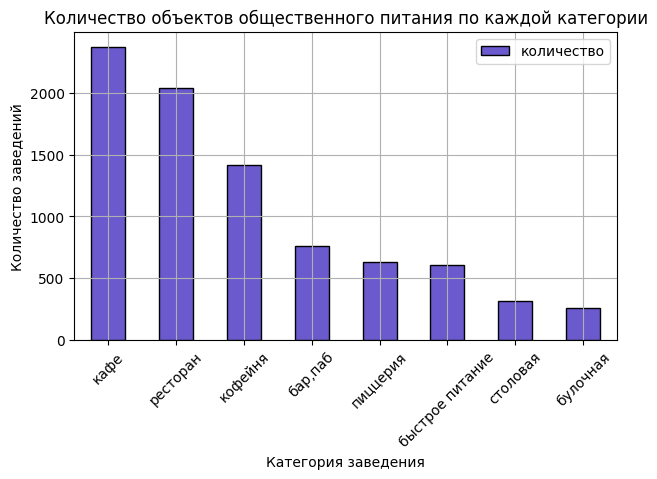

In [65]:
#создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(7, 4))

# создаем столбчатую диаграмму на основании количества уникальных значений столбца 'category'
category_count.plot(
    kind='bar',
    ax=ax,
    legend=False,
    rot=45,
    color='slateblue',
    edgecolor='black'
)

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Количество объектов общественного питания по каждой категории')
ax.set_xlabel('Категория заведения')
ax.set_ylabel('Количество заведений')
ax.grid(True)

# Настраиваем легенду диаграммы
ax.legend(['количество'])

plt.show()

#### Из результатов визуализации можно увидеть следующее:
- В Москве представлены 8 категорий заведений общественного питания, среди них: кафе, ресторан, кофейня, бар/паб, пиццерия, быстрое питание, столовая, булочная 
- Наибольшее количество объектов общественного питания приходится на кафе (2376 заведений, 28.27%) и ресторан (2042 заведений, 24.3%), т.е. более 2000 заведений
- Наименьшее количество объектов общественного питания приходится на столовую (315 заведений, 3.74%) и булочную (256 заведений, 3.04%), т.е. менее 500 заведений
- Усредненные значения по количеству объектов общественного питания имеет кофейня (1413 заведений, 16.81%), т.е. более 1000 заведений
- Бар/паб (764 заведений, 9.09%), пиццерия (633 заведений, 7.53%), быстрое питание (603 заведений, 7.17%) имеют примерно одинаковый диапазон значения в количестве заведений, т.е. более 500 заведений

### <a id='part3.2'>3.2. Исследование распределения количества заведений по административным районам Москвы, а также изучение распределения заведений каждой категории в Центральном административном округе Москвы.</a>

[Вернуться к содержанию](#content)

**Задачи:**
- Выяснить какие административные районы Москвы присутствуют в данных?
- Исследовать распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы
- Построить подходящие визуализации

Посчитаем уникальные значения столбца 'district', который содержит административный район, в котором находится заведение, с целью узнать количественное распределение объектов общественного питания в зависимости от административного района в абсолютных и относительных значениях.

In [66]:
# выводим количество уникальных значений столбца 'district'
district_count = rest_clean['district'].value_counts()
print('Распределение количества заведений по административным районам Москвы:')
print(district_count)
print(70*'-')
total_district_count = district_count.sum()
print(f'Общее количество заведений общественного питания: {total_district_count}')

Распределение количества заведений по административным районам Москвы:
district
центральный административный округ         2242
северный административный округ             898
южный административный округ                892
северо-восточный административный округ     890
западный административный округ             850
восточный административный округ            798
юго-восточный административный округ        714
юго-западный административный округ         709
северо-западный административный округ      409
Name: count, dtype: int64
----------------------------------------------------------------------
Общее количество заведений общественного питания: 8402


In [67]:
# выводим уникальные значения столбца 'district' в относительных значениях
district_ratio = rest_clean['district'].value_counts(normalize=True) * 100
print('Процентное распределение количества заведений по административным районам Москвы:')
print(district_ratio)

Процентное распределение количества заведений по административным районам Москвы:
district
центральный административный округ         26.684123
северный административный округ            10.687931
южный административный округ               10.616520
северо-восточный административный округ    10.592716
западный административный округ            10.116639
восточный административный округ            9.497739
юго-восточный административный округ        8.497977
юго-западный административный округ         8.438467
северо-западный административный округ      4.867889
Name: proportion, dtype: float64


Создадим визуализацию распределения заведений общественного питания в зависимости от административного района Москвы. Для этого нам понадобится линейчатая диаграмма, поскольку названия административных районов Москвы слишком длинные и по этой причине данный тип диаграммы здесь лучше подойдет.

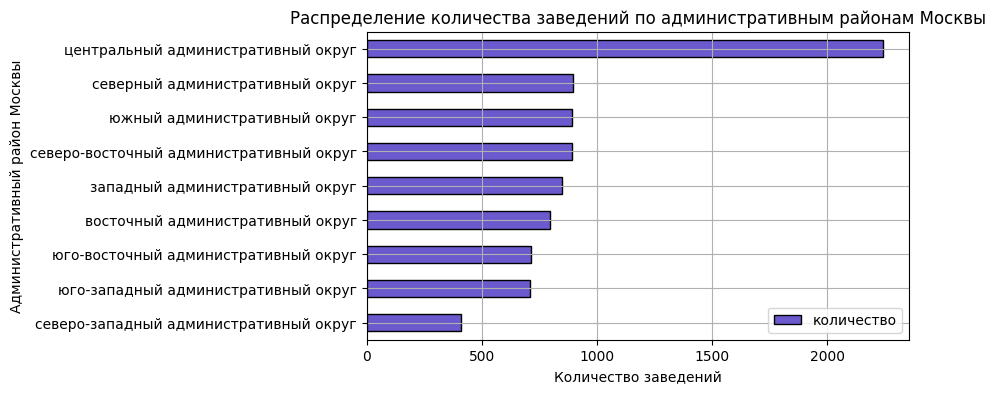

In [68]:
#создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(7, 4))

# создаем линейчатую диаграмму на основании количества уникальных значений столбца 'category'
district_count.sort_values(ascending=True).plot(
    kind='barh',
    ax=ax,
    legend=False,
    color='slateblue',
    edgecolor='black'
)

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Распределение количества заведений по административным районам Москвы')
ax.set_xlabel('Количество заведений')
ax.set_ylabel('Административный район Москвы')
ax.grid(True)

# Настраиваем легенду диаграммы
ax.legend(['количество'])

plt.show()

#### Из результатов визуализации можно увидеть следующее:
- В Москве заведения общественного питания распределены по 9 административным районам, среди них: Центральный административный округ, Северный административный округ, Южный административный округ, Северо-Восточный административный округ, Западный административный округ, Восточный административный округ, Юго-Восточный административный округ, Юго-Западный административный округ, Северо-Западный административный округ
- Наибольшее количество объектов общественного питания находится в Центральном административном округе (22424 заведений, 26.68%, т.е. более 2000 заведений
- Наименьшее количество объектов общественного питания находится в Северо-Западном административном округе (409 заведений, 4.86%), т.е. менее 500 заведений
- Остальные заведения общественного питания примерно одинаково распределились по оставшимся административным районам  в своем количестве, т.е. более 500 объектов общественного питания имеют Северный административный округ (898 заведений, 10.68%), Южный административный округ (892 заведений, 10.61%), Северо-Восточный административный округ (890 заведений, 10.59%), Западный административный округ (850 заведений, 10.11%), Восточный административный округ (798 заведений, 9.49), Юго-Восточный административный округ (714 заведений, 8.49%), Юго-Западный административный округ (709 заведений, 8.43%)

Теперь исследуем распределение заведений каждой категории в Центральном административном округе Москвы в абсолютных и относительных значениях.

В начале посчитаем  распределение заведений каждой категории в Центральном административном округе Москвы в абсолютных значениях

In [69]:
# фильтруем данные
central_administrative_district = rest_clean[rest_clean['district'] == 'центральный административный округ']

# считаем распределение заведений в Центральном административном округе в абсолютных значениях
print('Распределение заведений в Центральном административном округе в абсолютных значениях:')
cad_count = central_administrative_district['category'].value_counts()

print(cad_count)

Распределение заведений в Центральном административном округе в абсолютных значениях:
category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: count, dtype: int64


Теперь исследуем распределение заведений каждой категории в Центральном административном округе Москвы в относительных значениях.

In [70]:
# считаем распределение заведений в Центральном административном округе в относительных значениях
print('Распределение заведений в Центральном административном округе в относительных значениях:')
cad_ratio = central_administrative_district['category'].value_counts(normalize=True) * 100

print(cad_ratio)

Распределение заведений в Центральном административном округе в относительных значениях:
category
ресторан           29.884032
кафе               20.695807
кофейня            19.090098
бар,паб            16.235504
пиццерия            5.040143
быстрое питание     3.880464
столовая            2.943800
булочная            2.230152
Name: proportion, dtype: float64


Создадим визуализацию распределение заведений каждой категории в Центральном административном округе Москвы. Для этого нам понадобится столбчатая диаграмма, поскольку она предназначена для сравнения отдельных категорий.

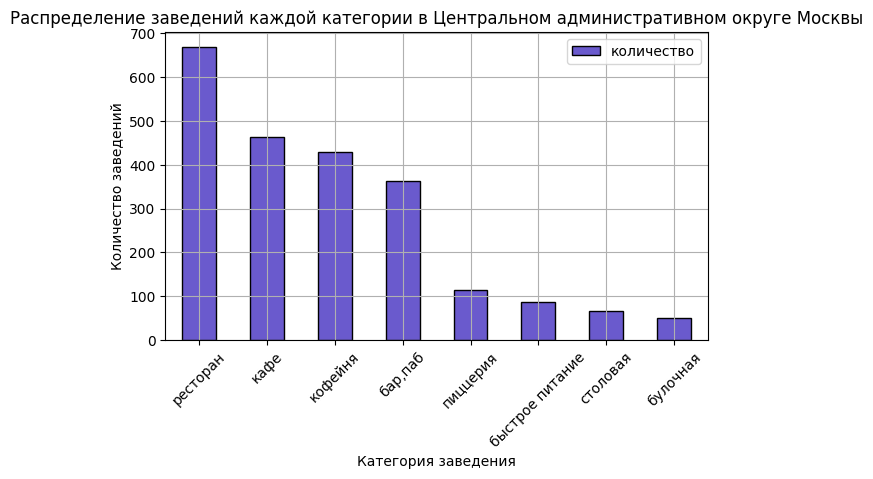

In [71]:
#создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(7, 4))

# создаем столбчатую диаграмму для визуализации данных
cad_count.plot(
    kind='bar',
    ax=ax,
    legend=False,
    rot=45,
    color='slateblue',
    edgecolor='black'
)

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Распределение заведений каждой категории в Центральном административном округе Москвы')
ax.set_xlabel('Категория заведения')
ax.set_ylabel('Количество заведений')
ax.grid(True)

# Настраиваем легенду диаграммы
ax.legend(['количество'])

plt.show()

#### Из результатов визуализации можно увидеть следующее:
- Рынок общественного питания составляет в Центральном административном округе Москвы 26.68% от общего числа
- Наибольшее количество объектов общественного питания в Центральном административном округе Москвы приходится на следующие категории:
  - Ресторан - 670 заведений (29.88%)
  - Кафе - 464 заведений  (20.69%)
  - Кофейня - 428 заведений (19.09%)
  - Бар/паб - 364 заведений (16.23%)
- Наименьшее количество объектов общественного питания в Центральном административном округе Москвы приходится на следующие категории:
  - Пиццерия - 113 заведений (5.04%)
  - Быстрое питание - 87 заведений (3.88%)
  - Столовая - 66 заведений (2.94%)
  - Булочная - 50 заведений (2.23%)
- В ЦАО Москвы можно увидеть отличия в топе в распределения категорий заведения в сравнении со всеми районами Москвы, а именно:
  - Наибольшее количество объектов питания по всей Москве приходится на кафе 28.27%, в то время как в ЦАО распределения кафе составляет всего лишь 20.69%. 
  - Сильное различие в процентном соотношении можно наблюдать в категории 'Бар/паб', в ЦАО распределеине баром и пабов заметно выше 16.23% в сравнении с 9.09% со всей Москвой

**Вывод:** Центральный административный округ является гастрономическим центром Москвы с наибольшим разнообразием и количеством заведений питания.

### <a id='part3.3'>3.3. Изучение соотношения сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.</a>

[Вернуться к содержанию](#content)

**Задачи:**
- Изучить соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения
- Ответить на вопросы:
    - Каких заведений больше — сетевых или несетевых?
    - Какие категории заведений чаще являются сетевыми?  
- Построить подходящие визуализации

#### Соотношение сетевых и несетевых заведений в целом

Изучим соотношение сетевых и несетевых заведений в целом по всем данным. В начале посчитаем уникальные значения столбца 'chain'

In [72]:
# Считаем уникальные значения столбца 'chain'
chain_total = len(rest_clean['chain'])
chain_count = rest_clean['chain'].value_counts()
print(f"Общее количество строк в столбце 'chain': {chain_total}")
print(70*'-')
print(f"Уникальные значения столбца 'chain': {chain_count}")

Общее количество строк в столбце 'chain': 8402
----------------------------------------------------------------------
Уникальные значения столбца 'chain': chain
False    5199
True     3203
Name: count, dtype: int64


Теперь изучим соотношение сетевых и несетевых заведений в разрезе категорий заведения. Для этой цели построим столбчатую диаграмму, в которой посчитаем количественное соотношение сетевых и несетевых заведений, где 0 - заведение не является сетевым, 1 - заведение является сетевым.

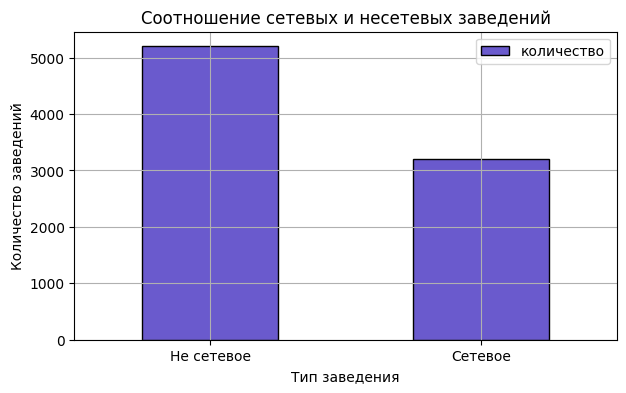

In [73]:
#создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(7, 4))

# создаем столбчатую диаграмму для визуализации данных
chain_count.plot(
    kind='bar',
    ax=ax,
    legend=False,
    rot=0,
    color='slateblue' ,
    edgecolor='black'
)

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Cоотношение сетевых и несетевых заведений')
ax.set_xlabel('Тип заведения')
ax.set_ylabel('Количество заведений')
ax.grid(True)

# Настраиваем легенду диаграммы
ax.legend(['количество'])

# Устанавливаем позиции делений
ax.set_xticks(ticks=[0, 1])

# Устанавливаем подписи
ax.set_xticklabels(labels=['Не сетевое', 'Сетевое'])

plt.show()

Посчитаем процентное соотношение сетевых и несетевых заведений

In [74]:
# Посчитаем процентное соотношение сетевых и несетевых заведений
chain_ratio = rest_clean['chain'].value_counts(normalize=True)*100
print(chain_ratio)

chain
False    61.878124
True     38.121876
Name: proportion, dtype: float64


Сделаем визуализацию процентного соотношение сетевых и несетевых заведений.

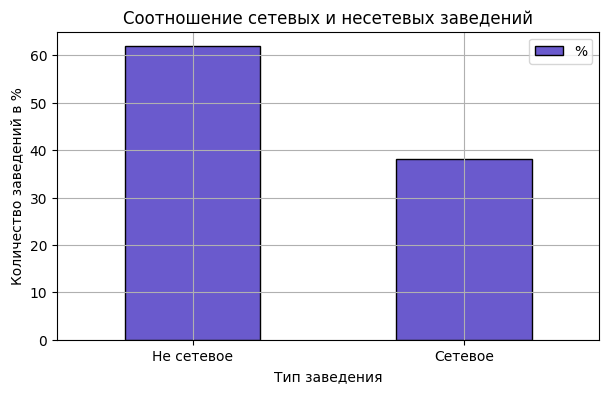

In [75]:
#создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(7, 4))

# создаем столбчатую диаграмму для визуализации данных
chain_ratio.plot(
    kind='bar',
    ax=ax,
    legend=False,
    rot=0,
    color='slateblue',
    edgecolor='black',
    label='Распределение заведений' 
)

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Cоотношение сетевых и несетевых заведений')
ax.set_xlabel('Тип заведения')
ax.set_ylabel('Количество заведений в %')
ax.grid(True)

# Настраиваем легенду диаграммы
ax.legend(['%'])

# Устанавливаем позиции делений
ax.set_xticks(ticks=[0, 1])

# Устанавливаем подписи
ax.set_xticklabels(labels=['Не сетевое', 'Сетевое'])

plt.show()

#### Как результат можно увидеть, что несетевых заведений больше, чем сетевых:
- Общее количество завелений общественного питания в анализируемой выборке - 8402
- Среди заведений общественного питания Москвы преобладают несетевые заведения:
  - В относительных значениях несетевые заведения составляют 61.9% против 38.1% сетевых
  - В абсолютных значениях 5201 несетевых заведений против 3205 сетевых

#### Соотношение сетевых и несетевых заведений в разрезе категорий заведения

Изучим соотношение сетевых и несетевых заведений в разрезе категорий заведения

Cтолбец 'chain' имеет булевый типа данных и содержит в значениях False (т.е. 0 - заведение не является сетевым) и True (т.е. 1 - заведение является сетевым).

Сгруппируем данные по двум столбцам одновременно: 'category' (категория заведения), 'chain' (типа заведения, т.е. сетевое или несетевое) и запишем все в новую переменную chain_category_counts. Также сделаем копию датасета rest_clean в переменную chain_category_counts, поскольку в дальнейшем нам нужно переименовать значения столбца 'chain'.

In [76]:
chain_category_counts = rest_clean.groupby(['category', 'chain']).size().unstack(fill_value=0).copy()

Для удобства переименуем значения столбца 'chain', а именно: 'no_chain' вместо False, 'chain' вместо True.

In [77]:
# Переименовываем значения 'столбца chain'
chain_category_counts = chain_category_counts.rename(columns={False: 'no_chain', True: 'chain'})

In [78]:
#chain_category_counts.info()

Рассчитаем процентное соотношение для сетевых и несетевых заведений

In [79]:
# Расчет общего количества заведений в каждой категории
chain_category_counts['total'] = chain_category_counts['no_chain'] + chain_category_counts['chain']

# Расчет доли несетевых заведений
chain_category_counts['no_chain_pct'] = (chain_category_counts['no_chain'] / chain_category_counts['total']) * 100

# Расчет доли сетевых заведений
chain_category_counts['chain_pct'] = (chain_category_counts['chain'] / chain_category_counts['total']) * 100

# Сортировка категорий
chain_category_counts = chain_category_counts.sort_values('total', ascending=False)

# Вывод результатов
print(chain_category_counts)

chain            no_chain  chain  total  no_chain_pct  chain_pct
category                                                        
кафе                 1597    779   2376     67.213805  32.786195
ресторан             1313    729   2042     64.299706  35.700294
кофейня               693    720   1413     49.044586  50.955414
бар,паб               596    168    764     78.010471  21.989529
пиццерия              303    330    633     47.867299  52.132701
быстрое питание       371    232    603     61.525705  38.474295
столовая              227     88    315     72.063492  27.936508
булочная               99    157    256     38.671875  61.328125


In [80]:
# Проверим, что у нас появились новые столбцы в переменной
chain_category_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, кафе to булочная
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   no_chain      8 non-null      int64  
 1   chain         8 non-null      int64  
 2   total         8 non-null      int64  
 3   no_chain_pct  8 non-null      float64
 4   chain_pct     8 non-null      float64
dtypes: float64(2), int64(3)
memory usage: 384.0+ bytes


Сделаем столбчатую диаграмму соотношения сетевых и несетевых заведений общественного питания Москвы в процентах.

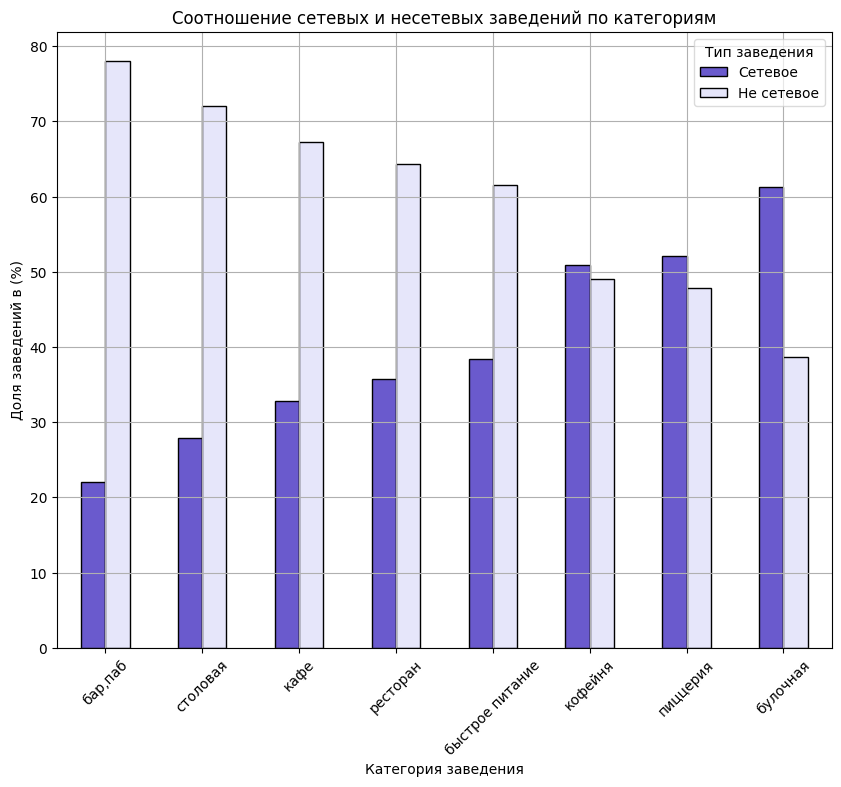

In [81]:
#создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(10, 8))

# Создаем столбчатую диаграмму по столбцам 'chain_pct' (доля сетевых заведений) и 'chain_pct' (доля несетевых заведений)
chain_category_counts[['chain_pct', 'no_chain_pct']].sort_values('no_chain_pct', ascending=False).plot(
    kind='bar',
    ax=ax,
    legend=False,
    rot=45,
    color=['slateblue', 'lavender'],
    edgecolor='black',
    label='Распределение заведений' 
)

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Cоотношение сетевых и несетевых заведений по категориям')
ax.set_xlabel('Категория заведения')
ax.set_ylabel('Доля заведений в (%)')
ax.grid(True)

# Настраиваем легенду диаграммы
ax.legend(title='Тип заведения', labels=['Сетевое', 'Не сетевое'], framealpha=0.7, loc='upper right')

plt.show()

#### Промежуточный вывод:
- **Наиболее популярными категориями заведений общественного питания в Москве являются:**
    - Кафе (2376 заведений):
        - 67.2% несетевых заведений, 32.8% сетевых
        - Преобладание сетевых заведений
    - Рестораны (2042 заведения):
        - 64.3% несетевых заведений, 35.7% сетевых
        - Преобладание сетевых заведений
    - Кофейни (1413 заведений):
        - Почти равное распределение: 49% несетевых заведения, 51% сетевых
        - Баланс между типами заведений
- **Наименее популярными категориями заведений общественного питания в Москве являются:**
    - Булочная (256 заведений):
        - 38.7% несетевых заведений, 61.3% сетевых
        - Преобладание несетевых заведений
    - Столовая (315 заведений):
        - 72.1% несетевых заведений, 27.9% сетевых
        - Преобладание несетевых заведений
- **Среднюю популярность по категориям заведений общественного питания в Москве имеют:**
    - бар,паб (764 заведения):
        - 78.0% несетевых заведений, 22.0% сетевых
        - Преобладание несетевых заведений
    - пиццерия (633 заведения):
        - 47.9% несетевых заведений, 52.1% сетевых
        - Баланс между типами заведений
    - быстрое питание (603 заведения):
        - 61.5% несетевых заведений, 38.5% сетевых
        - Преобладание несетевых заведений      
- **Преобладание сетевого типа заведения можно наблюдать в следующих категориях:**
   - Булочные (61.3% сетевых)
   - Пиццерии (52.1% сетевых)
- **Преобладание несетевого типа заведения можно наблюдать в следующих категориях:**
    - Бары, пабы (78.0% несетевых)
    - Столовые (72.1% несетевых)
    - Кафе (67.2% несетевых)

### <a id='part3.4'>3.4. Исследование количества посадочных мест в заведениях общественного питания.</a>

[Вернуться к содержанию](#content)

**Задачи:**
- Исследовать количество посадочных мест в заведениях
- Ответить на вопросы:
    - Встречаются ли в данных аномальные значения или выбросы?
    - Если да, то с чем они могут быть связаны?
- Привести для каждой категории заведений наиболее типичное для него количество посадочных мест
- Построить подходящие визуализации

Выведем основные числовые показатели столбца 'seats' (количество посадочных мест)

In [82]:
# Выводим основные числовые характеристики столбца 'seats'
rest_clean['seats'].describe()

count        4792.0
mean     108.361436
std       122.84113
min             0.0
25%            40.0
50%            75.0
75%           140.0
max          1288.0
Name: seats, dtype: Float64

**По основным числовым показателям столбца 'seats' можно сделать следующие выводы:**
- Основу рынка общественного питания в Москве (25 и 75 процентили) составляют заведения 40-140 посадочных мест
- Разброс значения очень высокий - 122.84, т.е. даже выше среднего значения - 108.36, т.е. распределение посадочных мест крайне неоднородно
- Рынок сильно сегментирован:
    - От заведений без посадочных мест (0 мест) - возможно связано с заведениями с акцентом на доставку еды/еду на вынос
    - До заведений с 1288 посадочных мест - возможно связано с присутствием заведений питания в спортивно-концертных комплексах, крупных фуд-кортов и ресторанов в развлекательных комплексах.

Для того чтобы определить являются ли такие расхождения в количестве посадочных мест аномальными значениями (редки тип заведения с большим количеством посадочных мест) или выбросами (ошибки при сборе данных), узнаем какое значение имеет 1 процентиль и 99 процентиль, а в последующем покажем первые строк в датасете в зависимости от процентиля.

In [83]:
# Считаем 1 процентиль
min_1_percent = rest_clean['seats'].quantile(0.01)
print(f"1 процентиль составляет: {min_1_percent}")

median_50_percent = rest_clean['seats'].quantile(0.5)
print(f"50 процентиль составляет: {median_50_percent}")

# Считаем 99 процентиль
max_1_percent = rest_clean['seats'].quantile(0.99)
print(f"99 процентиль составляет: {max_1_percent}")

1 процентиль составляет: 0
50 процентиль составляет: 75
99 процентиль составляет: 625


In [84]:
# Выводим первые строки 99 перцентиля
rest_clean[rest_clean['seats']>=max_1_percent].head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
1326,83575e8d81064584ab791877c9d5389c,нам,"бар,паб","москва, ленинградский проспект, 69, стр. 1",северный административный округ,"ежедневно, 11:00–21:00",4.2,True,625,NaN,неизвестно,<NA>,<NA>,False
1351,9d703f8cdfb7487abbad137d19083ad0,максима пицца,пиццерия,"москва, ленинградский проспект, 78, корп. 1",северный административный округ,"пн-пт 09:00–00:00; сб,вс 10:00–00:00",4.3,False,625,выше среднего,средний счёт: 1500–1800 ₽,1650,<NA>,False
1355,e925b8a0c4c54f24b5fa008f28ff0482,страдивари,ресторан,"москва, ленинградский проспект, 77, корп. 1",северный административный округ,"ежедневно, 11:00–23:00",4.2,True,625,выше среднего,средний счёт: 1000–2000 ₽,1500,<NA>,False
1367,0884fb8437f848f98677d3d4b92ae23d,академия,пиццерия,"москва, ленинградский проспект, 72, корп. 1",северный административный округ,"пн-пт 09:00–23:00; сб,вс 11:00–23:00",4.2,True,625,средние,средний счёт: 1000–1200 ₽,1100,<NA>,False
1380,b8e5cece843a4a52851b12ac8e90bdef,север-метрополь,кофейня,"москва, ленинградский проспект, 75, корп. 1",северный административный округ,"ежедневно, 09:00–21:00",4.6,True,625,NaN,неизвестно,<NA>,<NA>,False


In [85]:
# Выводим первые строки 1 перцентиля
rest_clean[rest_clean['seats']>=min_1_percent].head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",северный административный округ,"ежедневно, 10:00–22:00",4.5,False,4,выше среднего,средний счёт: 1500–1600 ₽,1550,<NA>,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,False,45,средние,средний счёт: от 1000 ₽,1000,<NA>,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",северный административный округ,"ежедневно, 10:00–22:00",5.0,True,148,средние,средний счёт: 400–600 ₽,500,<NA>,False
6,96ebceb1a09e4e3191133b9fe0379a64,огни города,"бар,паб","москва, клязьминская улица, 9, стр. 3",северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,4.4,False,45,средние,средний счёт: 199 ₽,199,<NA>,False
7,0243288b78024af090b8e947842c969c,mr. уголёк,быстрое питание,"москва, клязьминская улица, 9, стр. 3",северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",4.7,False,45,средние,средний счёт: 200–300 ₽,250,<NA>,False


#### Из результатов можно сделать следующий вывод:
- В результатах по 99 перцентилю мы можем увидеть, что разброс значения скорее связан с выбросом данных, т.е. их ошибочностью, что подтверждается сведениями из Интернета, а именно:
    - В кафейне 'Север-Метрополь указано, что обычно кофейня имеет от 15 до 20 посадочных мест 
    - В пиццерии 'Максима пицца' предусмотрено 208 посадочных мест
- В результатах по 1 перцентилю мы можем увидеть, что разброс значения скорее связан с выбросом данных, т.е. их ошибочностью, что подтверждается сведениями из Интернета, а именно:
    - В ресторане Четыре компнаты предусмотрено до 55 посадочных мест
    - В пиццерии 'Иль Марко' предусмотрено до 40 посадочных мест

Теперь сделаем визуализацию распределения посадочных мест в заведениях с помощью гистограммы и диаграммы размаха с целью визуально оценить симметричность распределения данных и выявить аномалии.

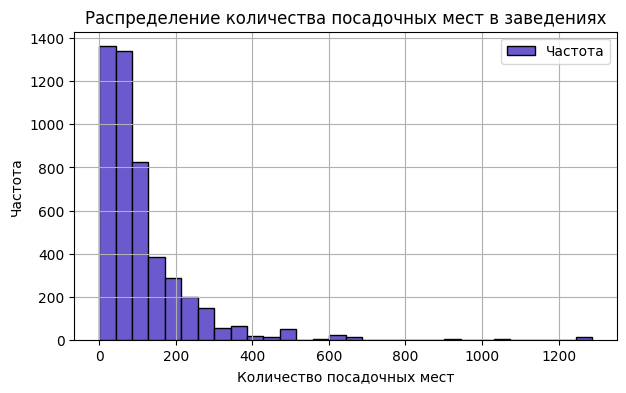

In [86]:
#создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(7, 4))

# Создаем гистограмму
rest_clean['seats'].plot(
    kind='hist',
    ax=ax,
    bins=30,
    legend=False,
    rot=0,
    color='slateblue',
    edgecolor='black'
)

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Распределение количества посадочных мест в заведениях')
ax.set_xlabel('Количество посадочных мест')
ax.set_ylabel('Частота')
ax.grid(True)

# Настраиваем легенду гистограммы
ax.legend(['Частота'])

plt.show()

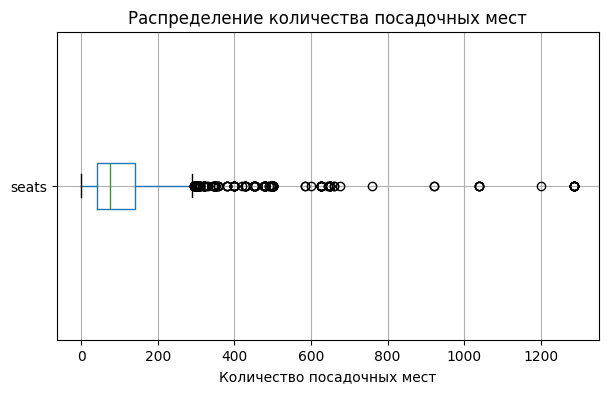

In [87]:
#создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(7, 4))

# Строим диаграмму размаха методом boxplot()
rest_clean.boxplot(
    column='seats',
    ax=ax,
    vert=False,
)

# Добавляем заголовок и метку оси X
ax.set_title('Распределение количества посадочных мест')
ax.set_xlabel('Количество посадочных мест')

plt.show()

#### Промежуточный вывод: 
- Медиана количества посадочных мест заведений приходится на значение около 80 посадочных мест
- Слишком много выбросов приходится на 99 процентиль в данных про количество посадочных мест заведений
- График распределения количества посадочных мест заведений  имеет неравномерное распределение данных, т.е. имеется правоассиметричность распределение данных

Таким образом, можно сделать вывод, что количество посадочных мест в заведениях общественного питания Москвы имеет правостороннюю асимметрию, что видно из графиков. Это указывает на наличие выбросов, которые могут искажать общую картину. В таком случае опираться на среднее значение было бы ошибкой.  
В таком случае, чтобы избавиться от выбросов и посчитать наиболее типичное и распространенное значение количества посадочных мест заведений общественного питания Москвы в зависимости от категории заведения, нам поможет анализ с помощью медианы.

Изучим какое количество посадочных мест заведений общественного питания в Москве наиболее типично для каждой категории заведений с помощью медианы, поскольку она наиболее устойчива к выбросам и аномальным значениям данных, к тому же медиана лучше отражает центральную тенденцию.

In [88]:
# Изучим медиану количества посадочных мест для каждой категории заведения
seats_median = rest_clean.groupby('category')['seats'].median().sort_values(ascending=False)
print(seats_median)

category
ресторан           86.0
бар,паб            82.0
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: Float64


Создадим визуализацию типичного распределение количества посадочных мест заведений общественного питания в Москве в зависимости от категории заведения.

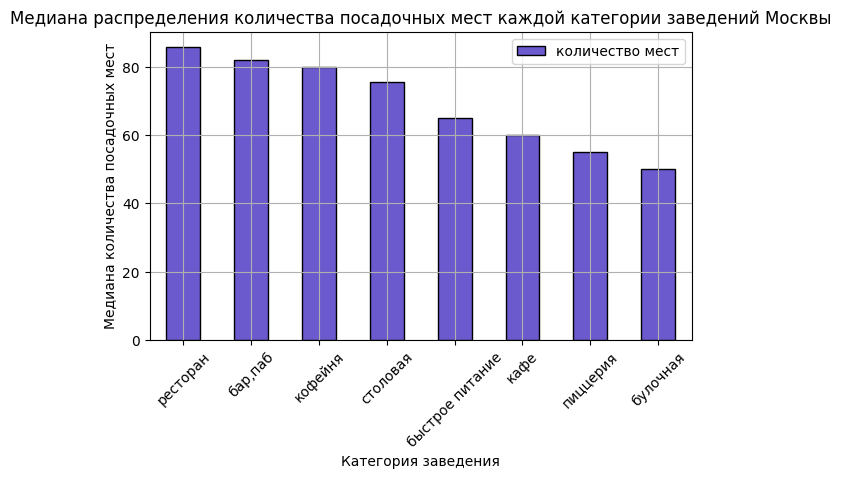

In [89]:
#создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(7, 4))

# создаем столбчатую диаграмму для визуализации данных
seats_count_visualization = seats_median.plot(
    kind='bar',
    ax=ax,
    legend=False,
    rot=45,
    color='slateblue',
    edgecolor='black'
)

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Медиана распределения количества посадочных мест каждой категории заведений Москвы')
ax.set_xlabel('Категория заведения')
ax.set_ylabel('Медиана количества посадочных мест')
ax.grid(True)

# Настраиваем легенду диаграммы
ax.legend(['количество мест'])

plt.show()

#### Промежуточный вывод: 
- Категории с наибольшей типичной вместимостью (количеством посадочных мест):
    - Рестораны (86 мест)
    - Бары/пабы (82 места)
    - Кофейни (80 мест)
- Категории со средней типичноЙ вместимостью (количеством посадочных мест):
    - Столовые (76 мест)
    - заведения быстрого питания (65 мест)
    - кафе (60 мест)
- Категории с наименьшей типичной вместимостью (количеством посадочных мест):
    - Пиццерии (55 мест)
    - Булочные (50 мест)

### <a id='part3.5'>3.5. Исследование рейтинга заведений общественного питания.</a>

[Вернуться к содержанию](#content)

**Задачи:**
- Исследовать рейтинг заведений
- Ответить на вопросы:
    - Сильно ли различаются усреднённые рейтинги для разных типов общепита?
- Визуализировать распределение средних рейтингов по категориям заведений

Посмотрим сводную статистику рейтингов всех заведений общественного питания.

In [90]:
# Выводим основные числовые характеристики столбца 'rating'
rest_clean['rating'].describe()

count    8402.000000
mean        4.230017
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

Исследуем средний рейтинг заведений общественного питания Москвы по каждой категории заведений.

In [91]:
# Выводим основные числовые показатели столбца 'rating'
rest_clean.groupby('category')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",764.0,4.387697,0.380392,1.1,4.3,4.4,4.6,5.0
булочная,256.0,4.268360,0.386303,1.3,4.2,4.3,4.4,5.0
быстрое питание,603.0,4.050249,0.560949,1.1,3.9,4.2,4.3,5.0
кафе,2376.0,4.124284,0.566001,1.0,4.0,4.2,4.4,5.0
кофейня,1413.0,4.277282,0.372250,1.4,4.1,4.3,4.4,5.0
пиццерия,633.0,4.301264,0.336162,1.0,4.2,4.3,4.4,5.0
ресторан,2042.0,4.290401,0.413143,1.0,4.2,4.3,4.5,5.0
столовая,315.0,4.211429,0.454205,1.0,4.1,4.3,4.4,5.0


In [92]:
# Выводим среднее значения рейтинга
avg_category_rating = rest_clean.groupby('category')['rating'].mean().sort_values(ascending=False)
print(avg_category_rating)

category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290401
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.124284
быстрое питание    4.050249
Name: rating, dtype: float32


Выведем уникальные значения столбца 'rating'

In [93]:
# Выводим уникальные значения столбца 'rating'
rest_clean['rating'].unique()

array([5. , 4.5, 4.6, 4.4, 4.7, 4.8, 4.3, 4.9, 4.2, 4.1, 4. , 3.8, 3.9,
       3.7, 3.6, 2.8, 2.7, 3.1, 1.5, 2. , 1.4, 3.3, 3.5, 3.2, 2.9, 3. ,
       3.4, 2.3, 2.2, 2.5, 2.6, 1.7, 1. , 1.1, 2.4, 1.3, 1.2, 2.1, 1.8,
       1.9, 1.6], dtype=float32)

Таким образом, можно увидеть, что диапозон оценки представлен от 1 до 5.

Посчитаем разницу в процентах между максимальным и минимальным среднем рейтингом.

In [94]:
# Диапозон изменения рейтинга (5-1 = 4 балла, т.е. рейтинг от 1 до 5)
rating_range = 4 

# Считаем разницу между максимальным и минимальным средним рейтингом в относительных значениях
rating_diff_pct = ((avg_category_rating.max() - avg_category_rating.min()) / rating_range) * 100
print(f'Разница между максимальным и минимальным средним рейтингом: {rating_diff_pct:.2f}% от общего диапазона оценок')

Разница между максимальным и минимальным средним рейтингом: 8.44% от общего диапазона оценок


Создадим визуализацию распределение средних рейтингов заведений общественного питания в Москве в зависимости от категории заведения.

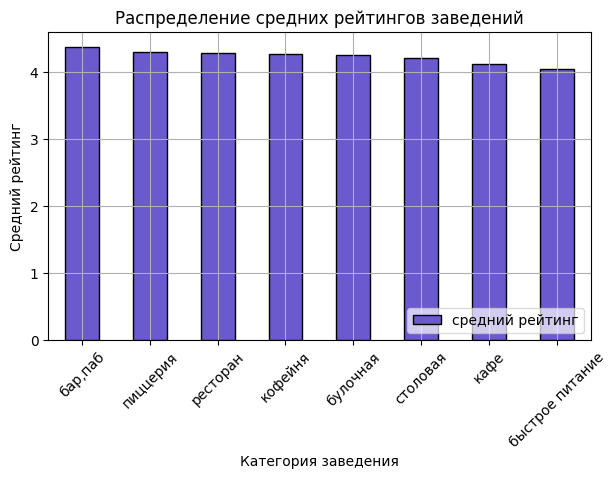

In [95]:
#создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(7, 4))

# создаем столбчатую диаграмму для визуализации данных
avg_category_rating.plot(
    kind='bar',
    ax=ax,
    legend=False,
    rot=45,
    color='slateblue',
    edgecolor='black'
)

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Распределение средних рейтингов заведений')
ax.set_xlabel('Категория заведения')
ax.set_ylabel('Средний рейтинг')
ax.grid(True)

# Настраиваем легенду диаграммы
ax.legend(labels=['средний рейтинг'], framealpha=0.7, loc='lower right')

plt.show()

#### Промежуточный вывод:
- Высокий общий рейтинг заведений общественного питания Москвы во всех категориях, т.е. рейтинг в зависимости от котегории заведения распределился от 4.05 до 4.38 по 5-балльной шкалле
- Разница между максимальным и минимальным средним рейтингом: 8.44% от общего диапазона оценок (т.е. диапозон оценки от 1 до 5)
- Значения столбца 'rating' имеют малый разброс и сконцентрировано близко к своему среднему значению, т.е. заведения общественного питания стабильно получают оценки рейтинг чуть выше 4
- Наибольшие рейтинг имеют бар/паб, пиццерия, ресторан, что возможно связано с атмосферой в заведениии, т.е. клиенты в том числе оценивают положительные эмоции, которые они получили от атмосферы заведения
- Наименьший рейтинг имеют быстрое питание, кафе, столовая, что возможно указывает на общую оценку скорости работы заведения

### <a id='part3.6'>3.6. Изучение матрицы корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным.</a>

[Вернуться к содержанию](#content)

**Задачи:**
- Изучить, с какими данными показывают самую сильную корреляцию рейтинги заведений
- Построить и визуализировать матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным?
- Выбрать самую сильную связь и проверить её.

Посчитаем корреляцию столбца 'rating' с требуемыми столбцами датасета, а именно: 'category', 'district', 'rating', 'chain', 'seats', 'price_category', 'is_24_7'.

In [96]:
# Создадим список столбцов, между которыми хотим посчитать корреляцию
corr_columns = rest_clean[[
    'category',
    'district',
    'rating',
    'chain',
    'seats',
    'price',
    'is_24_7',
]]

# Явно указываем, какие столбцы являются интервальными
interval_cols = ['rating', 'seats']

# Посчитаем корреляцию между перечисленными столбцами датафрейма
corr_matrix = corr_columns.phik_matrix(
    interval_cols=interval_cols
)

# Фильтруем именно только столбец 'rating'
corr_matrix_rating = corr_matrix.loc[corr_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

print(corr_matrix_rating) 

            rating
price     0.262056
category  0.198739
district  0.189453
is_24_7   0.161010
chain     0.118857
seats     0.000000


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно построена корреляционная матрица с использованием библиотеки `phik`, это позволяет не обращать внимание на линейность и не линейность взаимозависимости признаков и не использовать для них отдельные методы.</font>

Визуализируем корреляцию с помощью тепловой карты.

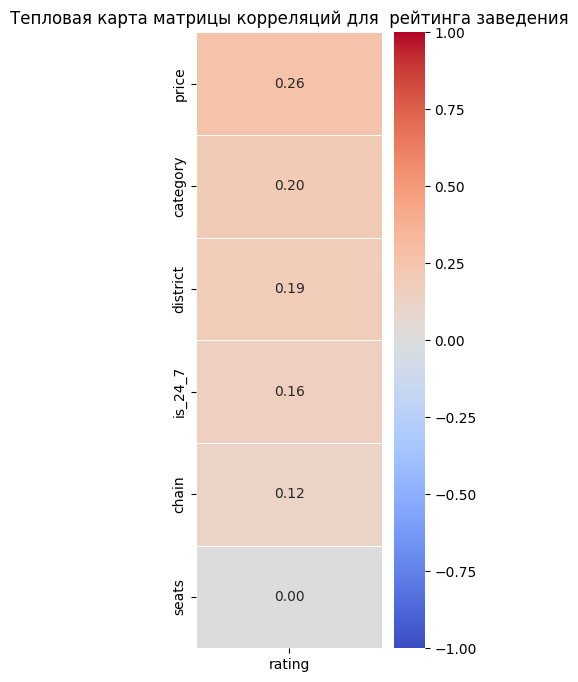

In [97]:
# Построим тепловую карту
plt.figure(figsize=(3, 8))
sns.heatmap(corr_matrix_rating, annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm', vmin=-1, vmax=1)

plt.title("Тепловая карта матрицы корреляций для  рейтинга заведения")
plt.show()

Как можно увидеть из результата, самая сильная корреляция наблюдается между рейтингом и ценовой категорией, корреляция между ними составляет 0.26.

Проверим данную корреляцию между рейтингом и ценовой категорией. С этой целью посчитаем средний рейтинг заведения в зависимости от категории цен.

In [98]:
# Считаем средний рейтинг заведения в зависимости от категории цен
rating_correlation = rest_clean.groupby('price')['rating'].mean().sort_values(ascending=False)
print('Средний рейтинг заведения в зависимости от категории цен')
print(rating_correlation) 

Средний рейтинг заведения в зависимости от категории цен
price
высокие          4.436611
выше среднего    4.386347
средние          4.297874
низкие           4.173077
Name: rating, dtype: float32


In [99]:
# Выводим основные числовые показатели
rest_clean.groupby('price')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
price,,,,,,,,
высокие,478.0,4.436611,0.314197,1.0,4.3,4.4,4.6,5.0
выше среднего,564.0,4.386347,0.223507,2.9,4.3,4.4,4.5,5.0
низкие,156.0,4.173077,0.372671,2.6,4.0,4.2,4.4,5.0
средние,2117.0,4.297874,0.295653,1.6,4.2,4.3,4.4,5.0


Сделаем визуализацию данной корреляции рейтинга с помощью столбчатой диаграммы.

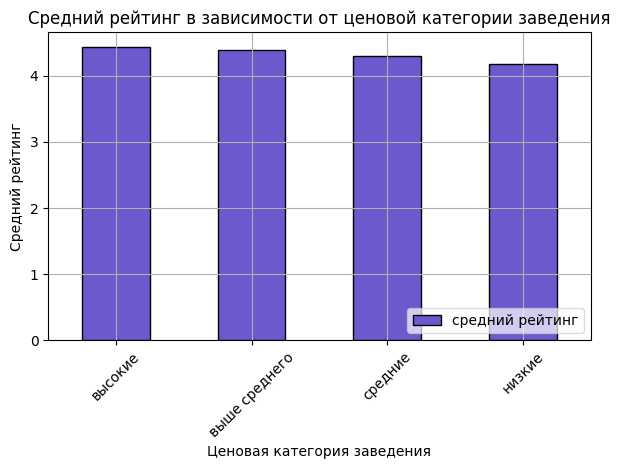

In [100]:
#создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(7, 4))

# создаем столбчатую диаграмму для визуализации данных
rating_correlation.plot(
    kind='bar',
    ax=ax,
    legend=False,
    rot=45,
    color='slateblue',
    edgecolor='black'
)

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Средний рейтинг в зависимости от ценовой категории заведения')
ax.set_xlabel('Ценовая категория заведения')
ax.set_ylabel('Средний рейтинг')
ax.grid(True)

# Настраиваем легенду диаграммы
ax.legend(labels=['средний рейтинг'], framealpha=0.7, loc='lower right')

plt.show()

#### Промежуточный вывод:
- Самая сильная корреляция наблюдается между рейтингом и ценовой категорией, корреляция между ними составляет 0.26.  
- Корреляция между рейтингом и ценовой категорией (0.26) - умеренная положительная, которая означает:
    - Более дорогие заведения, как правило, получают более высокие оценки
    - Атмосфера заведения влияет на оценки клиентов

### <a id='part3.7'>3.7. Исследование топ-15 популярных сетей в Москве.</a>

[Вернуться к содержанию](#content)

**Задачи:**
- Сгруппировать данные по названиям заведений и найти топ-15 популярных сетей в Москве
- Посчитать для топ-15 популярных сетей в Москве значения среднего рейтинга
- Ответить на вопросы:
    - К какой категории заведений относятся топ-15 популярных сетей в Москве?
- Построить подходящие визуализации

Поскольку мы преобразовали типа данных в столбце 'chain' в булевый типа данных, столбец 'chain' содержит:
- True - это 1, т.е. заведение является сетевым
- False - это 0, т.е. заведение не является сетевым

In [101]:
# Фильтруем датасет, чтобы в нем оставались только сетевые заведения
filtered_rest = rest_clean[rest_clean['chain'] == True].copy()

Ищем топ-15 популярных сетей по количеству заведений. Также считаем для них средний рейтинг и категорию для каждой сети.

In [102]:
# Выделяем топ-15 популярных сетей по количеству заведений, а также средний рейтинг и категорию для каждой сети
top_15_rest_chain = filtered_rest.groupby(['name', 'category']).agg(   
    count=('id', 'count'),
    mean_rating=('rating', 'mean')).sort_values(by='count', ascending=False).head(15).reset_index()
print(top_15_rest_chain)

                                   name  category  count  mean_rating
0                           шоколадница   кофейня    119     4.178151
1                        домино'с пицца  пиццерия     76     4.169737
2                            додо пицца  пиццерия     74     4.286487
3                      one price coffee   кофейня     71     4.064789
4                          яндекс лавка  ресторан     69     3.872464
5                                 cofix   кофейня     65     4.075385
6                                 prime  ресторан     49     4.114285
7                              кофепорт   кофейня     42     4.147619
8   кулинарная лавка братьев караваевых      кафе     39     4.394872
9                               теремок  ресторан     36     4.105556
10                             cofefest   кофейня     31     3.977419
11                              чайхана      кафе     26     3.946154
12                              буханка  булочная     25     4.416000
13                  

Делаем сортировку по среднему рейтингу топ-15 популярных сетей.

In [103]:
# Выделяем топ-15 популярных сетей по среднему рейтингу
top_15_rest_chain.sort_values(by='mean_rating', ascending=False).head(15).reset_index()

,index,name,category,count,mean_rating
0,14,кофемания,кофейня,22,4.463636
1,12,буханка,булочная,25,4.416000
2,8,кулинарная лавка братьев караваевых,кафе,39,4.394872
3,2,додо пицца,пиццерия,74,4.286487
4,0,шоколадница,кофейня,119,4.178151
5,1,домино'с пицца,пиццерия,76,4.169737
6,7,кофепорт,кофейня,42,4.147619
7,6,prime,ресторан,49,4.114285
8,9,теремок,ресторан,36,4.105556
9,5,cofix,кофейня,65,4.075385


**Создаем визуализацию топ-15 популярных сетей общественного питаний Москвы**

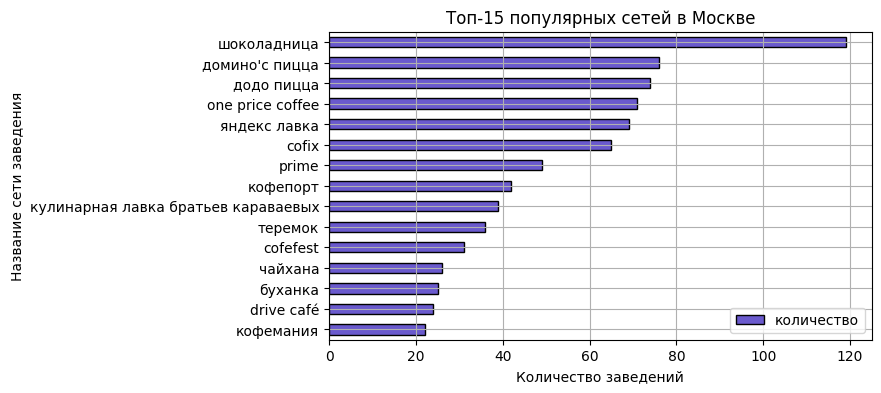

In [104]:
#создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(7, 4))

# создаем линейчатую диаграмму топ-15 популярных сетей общественного питаний Москвы
top_15_rest_chain.sort_values(by='count', ascending=True).plot(
    kind='barh',
    ax=ax,
    x='name',
    y='count',
    legend=False,
    color='slateblue',
    edgecolor='black'
)

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Топ-15 популярных сетей в Москве')
ax.set_xlabel('Количество заведений')
ax.set_ylabel('Название сети заведения')
ax.grid(True)

# Настраиваем легенду диаграммы
ax.legend(['количество'])

plt.show()

**Создаем визуализацию распределения рейтинга среди топ-15 популярных сетей общественного питаний Москвы**

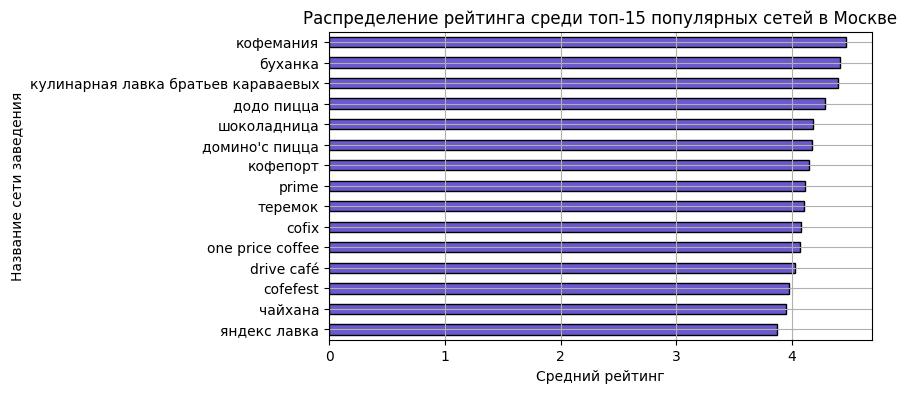

In [105]:
#создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(7, 4))

# создаем линейчатую диаграмму топ-15 популярных сетей общественного питаний Москвы
top_15_rest_chain.sort_values(by='mean_rating', ascending=True).plot(
    kind='barh',
    ax=ax,
    x='name',
    y='mean_rating',
    legend=False,
    color='slateblue',
    edgecolor='black'
)

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Распределение рейтинга среди топ-15 популярных сетей в Москве')
ax.set_xlabel('Средний рейтинг')
ax.set_ylabel('Название сети заведения')
ax.grid(True)

plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно визуализированы средние рейтинги топ-15 сетевых заведений.</font>

**Распределения категорий заведения среди топ-15 популярных сетей общественного питаний Москвы**

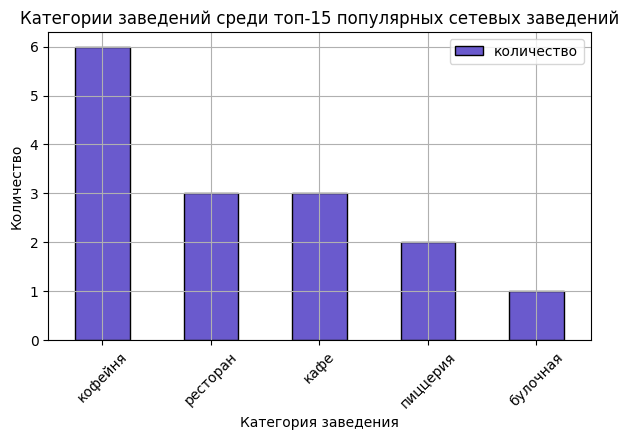

In [106]:
#создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(7, 4))

# создаем столбчатую диаграмму для визуализации данных
top_15_rest_chain.groupby('category')['name'].count().sort_values(ascending=False).plot(
    kind='bar',
    ax=ax,
    legend=False,
    x='category',
    y='count',
    rot=45,
    color='slateblue',
    edgecolor='black'
)

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Категории заведений среди топ-15 популярных сетевых заведений')
ax.set_xlabel('Категория заведения')
ax.set_ylabel('Количество')
ax.grid(True)

# Настраиваем легенду диаграммы
ax.legend(labels=['количество'], loc='upper right')

plt.show()

#### Промежуточный вывод:
- Самым популярным сетевым заведением является 'Шоколадница', которая имеет 119 заведений общественного питания
- Топ-3 сети по количеству заведений: "Шоколадница" (119), "Домино'с Пицца" (76), "ДоДо Пицца" (74)
- Среди распределения категорий топ-15 популярных сетевых заведений можно наблюдать следующее:
  - Кофейни представлены в большем количестве (6 из 15 сетей), среди них: 'Шоколадница', 'One Price Coffee', 'Cofix', 'Кофепорт', 'CofeFest', 'Кофемания'
  - Также достаточно хорошо представлены кафе (3 из 15 сетей), ресторан (3 из 15 сетей) и пиццерия (2 из 15 сетей):
      - Кафе: 'Кулинарная лавка братьев Караваевых', 'Чайхана', 'Drive Cafe'
      - Ресторан: 'Яндекс Лавка', 'Prime', 'Теремок'
      - Пиццерия: "Домино'с Пицца", 'ДоДо Пицца'
  - В топ-15 также вошли булочная (1 из 15 сетей):
      - Булочная: 'Буханка'
- Средний рейтинг:
    - Самый высокий рейтинг у 'Кофемании' (4.46), 'Буханки' (4.41) и 'Кулинарной лавки братьев Караваевых' (4.39)
    - Самый низкий рейтинг у 'Яндекс Лавки' (3.87)
    - Средние рейтинги топ-15 популярных сетевых заведений общественного питания в Москве находятся в диапазоне 3.87-4.46 (по 5-балльной шкале) 

**Вывод:** Рынок сетевого общепита Москвы характеризуется высокой конкуренцией, доминированием кофейных сетей и высоким качеством обслуживания во всех категориях заведений.

### <a id='part3.8'>3.8. Изучение вариации среднего чека заведения в зависимости от района Москвы.</a>

[Вернуться к содержанию](#content)

**Задачи:**
- Изучить вариацию среднего чека заведения (столбец middle_avg_bill) в зависимости от района Москвы
- Проанализировать цены в центральном административном округе и других
- Ответить на вопросы:
    - Как удалённость от центра влияет на цены в заведениях?
- Построить подходящие визуализации

**Изучим данные по среднему чеку заведений общественного питания в Москве.**

В начале выведем основные статистические показатели среднего чека.

In [107]:
# Выводим основные статистические показатели среднего чека
rest_clean['middle_avg_bill'].describe()

count         3149.0
mean      958.053668
std      1009.732845
min              0.0
25%            375.0
50%            750.0
75%           1250.0
max          35000.0
Name: middle_avg_bill, dtype: Float64

Создадим визуализацию среднего чека заведений общественного питания с помощью гистограммы и диаграммы размаха, для оценки размаха распределения, его симметричности и наличия выбросов.

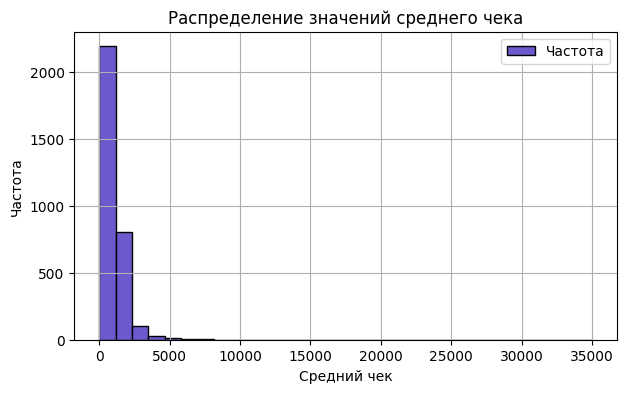

In [108]:
#создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(7, 4))

# Создаем гистограмму
rest_clean['middle_avg_bill'].plot(
    kind='hist',
    ax=ax,
    bins=30,
    legend=False,
    rot=0,
    color='slateblue',
    edgecolor='black'
)

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Распределение значений среднего чека')
ax.set_xlabel('Средний чек')
ax.set_ylabel('Частота')
ax.grid(True)

# Настраиваем легенду гистограммы
ax.legend(['Частота'])

plt.show()

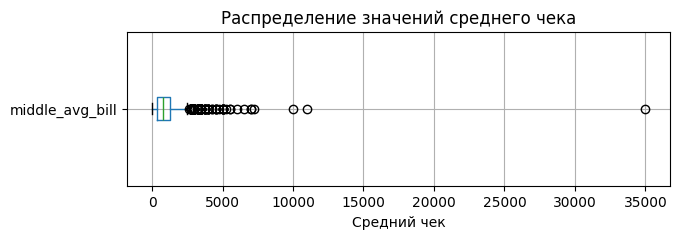

In [109]:
#создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(7, 2))

# Строим диаграмму размаха методом boxplot()
rest_clean.boxplot(
    column='middle_avg_bill',
    ax=ax,
    vert=False,
)

# Добавляем заголовок и метку оси X
ax.set_title('Распределение значений среднего чека')
ax.set_xlabel('Средний чек')

plt.show()

#### Промежуточный вывод:
- График распределения количества распределения значений среднего чека заведений общественного питания в Москве имеет неравномерное распределение данных, т.е. имеется правоассиметричность распределение данных
- Большинство заведений имеют относительно невысокий средний чек, но есть несколько с очень высокими значениями
- Медиана (750) значительно меньше среднего (958)
- Данные столбца 'middle_avg_bill' (средний счет) имеют значительное стандартное отклонение (1009.7), которое больше среднего значения (958), что означает, что данные очень разнородны
- Максимальный средний чек составил 35000 рублей, а минимальный 0 рублей, что возможно может являться выбросом, что нужно проверить
- 50% заведений имеют средний чек от 375 до 1250 рублей, т.е. диапозон между 25 персентилем и 75 персентилем

Выведем заведения с минимальным и максимальным средним чеком.

In [110]:
# Посмотреть заведения со средним чеком 0 рублей
rest_clean[rest_clean['middle_avg_bill'] == 0].head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
3688,502d91289bc5470eabd77fd77cc79821,кофемания,кофейня,"москва, улица новый арбат, 19",центральный административный округ,"ежедневно, круглосуточно",4.5,True,200,высокие,средний счёт: от 0 ₽,0,<NA>,True


In [111]:
# Посмотреть заведения со средним чеком 35000 рублей
rest_clean[rest_clean['middle_avg_bill'] == 35000].head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
7177,07b4e95afe8b4d299f823dc4f9de6df5,кафе,ресторан,"москва, каширское шоссе, 23, стр. 2",южный административный округ,"ежедневно, круглосуточно",4.1,False,100,высокие,средний счёт: 20000–50000 ₽,35000,<NA>,True


Из результатов вывода первых строк минимального и максимального среднего чека заведений общественного питания Москвы следует:
- Единичные случаи чека в 0 рублей, т.е. это не имеет под собой никакой закономерности и не являются отдельным сегментом рынка
- Согласно сведениям из Интернета в Кофемании средний чек от 1500 руб. до 4000 руб., но никак не 0, что возможно указывает на ошибку в данных
- Согласно сведениям из Интернета ресторан "Кафе" с самым высоким средним чеком из выборки данных по данному адресу действительно имел средний счет от 20000 руб. до 50000 руб.

**Изучим вариацию среднего чека заведений (столбец middle_avg_bill) в зависимости от района Москвы**

In [112]:
# Считаем средний чек в зависимости от района Москвы

avg_price_district = rest_clean.groupby('district').agg(
    median=('middle_avg_bill', 'median'),
    mean=('middle_avg_bill', 'mean')
).reset_index()
    
print(avg_price_district)

                                  district  median         mean
0         восточный административный округ   575.0   820.626923
1          западный административный округ  1000.0   1053.22549
2          северный административный округ   650.0   927.959627
3  северо-восточный административный округ   500.0   716.611296
4   северо-западный административный округ   700.0    822.22293
5       центральный административный округ  1000.0  1191.057547
6     юго-восточный административный округ   450.0   654.097938
7      юго-западный административный округ   600.0   792.561702
8             южный административный округ   500.0   834.398089


Построим диаграмму, которая покажет зависимость типичного среднего чека от административного округа.

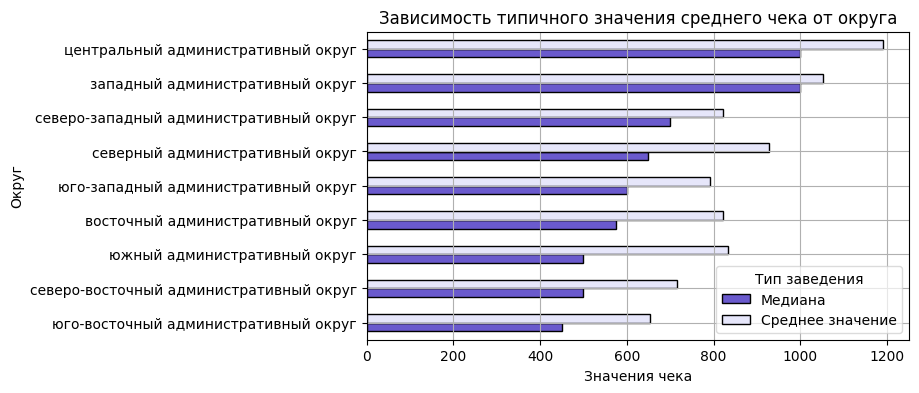

In [113]:
# Сортируем данные
sort_avg_middle_bill = avg_price_district.sort_values(by='median', ascending=True).copy()

#создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(7, 4))

# Устанавливаем округа как индекс для правильной работы barh
sort_avg_middle_bill = sort_avg_middle_bill.set_index('district')

# создаем линейчатую диаграмму среднего чека в зависимости от района Москвы
sort_avg_middle_bill[['median', 'mean']].plot(
    kind='barh',
    ax=ax,  
    legend=False,
    color=['slateblue', 'lavender'],
    edgecolor='black'
)

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Зависимость типичного значения среднего чека от округа')
ax.set_xlabel('Значения чека')
ax.set_ylabel('Округ')
ax.grid(True)

# Настраиваем легенду диаграммы
ax.legend(
    title='Тип заведения', 
    labels=['Медиана', 'Среднее значение'], 
    framealpha=0.7, 
    loc='lower right')


plt.show()

#### Промежуточный вывод:
- Центральный (ЦАО) и Западный (ЗАО) административные округа Москвы лидируют в среднем чеке заведения общественного питания:
    - У Центрального административного округа Москвы средний чек составляет 1191 руб. (медиана 1000 руб.)
    - У Западного административного округа Москвы средний чек составляет 1053 руб. (медиана 1000 руб.)
- Можно также наблюдать, что удалённость от центра коррелирует со снижением цен в заведениях:
    - Высокий средний чек (свыше 1000 руб.) характерен для: Центрального административного округа, Западного административного округа
    - Средний чек (от 750 до 950 руб.) характерен для: Северного административного округа, Южного административного округа, Северо-Западного административного округа, Восточного административного округа, Юго-Западного административного округа
    - Ниже среднего чек (менее 750 руб.) характерен для: Северо-Восточного административного округа, Юго-Восточного административного округа
- На ценовую политику заведений имеет влияние локация округа, где сочетаются факторы платежеспособного спроса, стоимости аренды и общей престижности района
- Также по графику можно наблюдать наличие значительного расхождения между медианой и средним значением во всем округах Москвы, кроме Западного и Северо-Западного административных округов, что может показывать, насколько распределение искажено дорогими заведениями общественного питания
- В тоже время минимальное расхождение между медианой и средним значением в Западном и Северо-Западном административными округами свидетельствуют об однородности рынка в данных округах.

### <a id='conslusion3'>Вывод по исследовательскому анализу данных</a>

[Вернуться к содержанию](#content)

#### При проведении исследовательского анализа рынка общественного питания в Москве были получены следующие результаты:
- **Исследование количества объектов общественного питания по каждой категории:**
  -  Рынок формируется двумя ключевыми категориями - кафе (2376 заведений, 28.27%) и рестораны (2042 заведений, 24.3%), на которые суммарно приходится более половины всех заведений
  -  Средний сегмент: Кофейни (1413 заведений, 16.81%) представляют значительный сегмент рынка.
  -  Бар/паб (764 заведений, 9.09%), пиццерия (633 заведений, 7.53%) и быстрое питание (603 заведений, 7.17%) имеют сопоставимую долю рынка (примерно по 7-9% каждое).
  - Наименьшее распространение имеют столовые (315 заведений, 3.74%) и булочные (256 заведений, 3.04%), что возможно отражает современные тренды потребительского спроса.
- **Исследование распределения количества заведений по административным районам Москвы, а также изучение распределения заведений каждой категории в Центральном административном округе Москвы:**
  - Центральный административный округ (ЦАО) является гастрономическим центром города, концентрируя 26.68% всех заведений - больше, чем любой другой округ.
  - В Центральном административном округе смещены приоритеты по сравнению с другими административными округами Москвы. Здесь лидирует категория ресторанов (29.88%), а не кафе как по всей Москве.
  - Доля баров/пабов (16.23%) в Центральном административном округе (ЦАО) почти в два раза выше, чем в среднем по Москве (9.09%), что указывает на развитую ночную жизнь и развлекательный кластер.
  - Доли кафе (20.69%), быстрого питания (3.88%), столовых (2.94%) и булочных (2.23%) в Центральном административном округе (ЦАО) составляет  ниже средних по городу, что подтверждает его статус территории премиального досуга.
- **Изучение соотношения сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения:**
  - В целом по Москве рынок общественного питания сохраняет независимый характер - 61,9% заведений являются несетевыми против 38.1% сетевых заведений.
  - Лидеры рынка (кафе и рестораны) имеют явный перевес в сторону несетевых заведений (для кафе - 67.2% и для ресторанов - 64.3%), что может говорить о высокой предпринимательской активности.
  - Булочные (61,3% сетевых) и пиццерии (52,1% сетевых) - это категории, где сильнее всего выражена стандартизация продукции, что является преимуществом для сетевой модели.
  - Бары/пабы (78% несетевых) и столовые (72,1% несетевых) - это наиболее "антисетевые" форматы. Их успех сильно зависит от уникальной концепции (для баров) или привязки к конкретному учреждению/месту (для столовых).
  - Кофейни демонстрируют примерно равное разделение (51% сетевых / 49% несетевых). Это указывает на зрелость и высокую конкуренцию рынка, где успешно сосуществуют крупные федеральные сети и локальные независимые проекты.
- **Исследование количества посадочных мест в заведениях общественного питания:**
  -  Распределение количества посадочных мест является правоасимметричным. Это означает, что типичная (медианная) вместимость большинства заведений меньше, чем средняя арифметическая, на которую могут влиять единичные огромные рестораны.
  -  Самые вместительные форматы (75+ мест): Рестораны (86), бары/пабы (82), кофейни (80). Это сегменты, ориентированные на продолжительное времяпрепровождение и/или высокий трафик (кофейни).
  -  Средние по вместимости форматы (50-75 мест): Столовые (76), заведения быстрого питания (65), кафе (60). Баланс между пропускной способностью и комфортом.
  -  Наименее вместительные форматы (менее 60 мест): Пиццерии (55) и булочные (50). Эти категории часто рассчитаны на быстрое обслуживание, с форматом еды на вынос/еда с собой.
- **Исследование рейтинга заведений общественного питания:**
  - Рейтинги всех категорий заведений находятся в высоком диапазоне от 4.05 до 4.38 по 5-балльной шкале. Это свидетельствует о в целом высоком уровне качества московского рынка общепита.
  - Малая разница между максимальным и минимальным средним рейтингом (всего 8.44% от всего диапазона возможных оценок) подтверждает, что в заведениях разного типа качество услуг стабильно хорошее.
  - Наибольший рейтинг у баров/пабов, пиццерий и ресторанов. Это форматы, где ключевую роль играет досуговый компонент и создаваемая атмосфера, что усиливает положительное восприятие.
  - Наименьший рейтинг у заведений быстрого питания, столовых и кафе. Эти сегменты в большей степени оцениваются по скорости, эффективности и соотношению цены и качества, где эмоциональная составляющая минимальна.
- **Изучение матрицы корреляции рейтинга заведения с разными данными:**
  - Ценовая категория как ключевой индикатор: обнаружена умеренная положительная корреляция (0.26) между ценой и рейтингом.
  - Более дорогие заведения, как правило, получают более высокие оценки.
      - **Вывод:** В более дорогих заведениях (рестораны, бары) клиенты платят не только за еду, но и за атмосферу, сервис и впечатления, что в среднем оправдывается и приводит к более высоким оценкам.
- **Исследование топ-15 сетевых заведений Москвы:**
  - Самым популярным сетевым заведением является 'Шоколадница' (119 заведений), которая существенно опережает конкурентов, что подчеркивает высокую популярность формата кофеен.
  - Топ-3 формируют кофейни и пиццерии. Вслед за «Шоколадницей» идут «Домино’с Пицца» (76) и «ДоДо Пицца» (74), подтверждая, что эти две категории (кофе и пицца) наиболее приспособлены для масштабирования в сетевом формате в Москве.
  - Доминирование кофейного сегмента. Половина мест в топ-15 (6 из 15) принадлежит кофейным сетям, среди них: 'Шоколадница', 'One Price Coffee', 'Cofix', 'Кофепорт', 'CofeFest', 'Кофемания'
  - Высокие стандарты обслуживания. Средние рейтинги сетей-лидеров (3.87 – 4.46) соответствуют общему высокому уровню рынка. «Кофемания» (4.46), «Буханка» (4.41) и «Кулинарная лавка братьев Караваевых» (4.39) задают высокую планку качества.
- **Изучение вариации среднего чека заведения в зависимости от района Москвы:**
  - Распределение среднего чека имеет сильную правостороннюю асимметрию. Стандартное отклонение (1009.7) превышает среднее значение (958), а максимальный чек достигает 35000 рублей, что указывает на крайнюю неоднородность данных и наличие единичных заведений с аномально высокими ценами.
  - Из-за асимметрии медиана (750 руб.) лучше отражает типичную ситуацию, чем среднее арифметическое (958 руб.). Половина всех заведений имеет средний чек в диапозоне от 375 до 1250 рублей, т.е. диапозон между 25 персентилем и 75 персентилем.
  - Центральный (ЦАО) и Западный (ЗАО) административные округа Москвы лидируют в среднем чеке заведения общественного питания:
    - У Центрального административного округа Москвы средний чек составляет 1191 руб. (медиана 1000 руб.)
    - У Западного административного округа Москвы средний чек составляет 1053 руб. (медиана 1000 руб.)
  - Можно также наблюдать, что удалённость от центра коррелирует со снижением цен в заведениях:
    - Высокий средний чек (свыше 1000 руб.) характерен для: Центрального административного округа, Западного административного округа
    - Средний чек (от 750 до 950 руб.) характерен для: Северного административного округа, Южного административного округа, Северо-Западного административного округа, Восточного административного округа, Юго-Западного административного округа
    - Ниже среднего чек (менее 750 руб.) характерен для: Северо-Восточного административного округа, Юго-Восточного административного округа.

## <a id='common_conclusion'>Итоговый вывод</a>

[Вернуться к содержанию](#content)

#### 1. Общий обзор проделанной работы.  
В ходе работы было сделано следующее:
- **Предобработка данных:** преобразование типов данных, обработка пропусков, устранение дубликатов, нормализация данных (приведение к единому регистру), создание нового столбца (с целью последующего анализа его данных).
- **Исследовательский анализ:** изучение распределения заведений по категориям и районам, анализ сетевого/несетевого соотношения заведений, исследование посадочных мест, рейтингов, корреляций, популярных сетей и ценовой политики.
- **Визуализация результатов:** графическое представление ключевых закономерностей для наглядности выводов.
#### 2. Главные выводы по проведенным исследованиям.  
- **Структура рынка общественного питания Москвы:**
    - На рынке наиболее популярны кафе (2376 заведений, 28.27%), рестораны (2042 заведений, 24.3%), кофейни (1413 заведений, 16.81%).
    - Наименее популярными категориями заведений общественного питания представлены булочной (256 заведений, 3.04%), столовой (315 заведений, 3.74%).
    - Центральный административный округ концентратор гастрономической жизни: здесь расположено 2242 заведения (26.68% от общего числа заведений).
    - Наименьшее количество заведений в Северо-Западном округе (409 заведений, 4.86%).
    - В Центральный административный округe преобладают рестораны (670 заведений, 29.88%), кафе (464 заведений, 20.69%), кофейни (428 заведений 19.09), Бары/пабы (364 заведений, 16.23%)
    - В ЦАО Москвы можно увидеть отличия в топе в распределения категорий заведения в сравнении со всеми районами Москвы, а именно:
        - Наибольшее количество объектов питания по всей Москве приходится на кафе 28.27%, в то время как в ЦАО распределения кафе составляет всего лишь 20.69%.
        - Сильное различие в процентном соотношении можно наблюдать в категории 'Бар/паб', в ЦАО распределеине баром и пабов заметно выше 16.23% в сравнении с 9.09% со всей Москвой
- **Cоотношения сетевых и несетевых заведений:**
    - Преобладают несетевые заведения, т.е. несетевые заведения составляют 61.9% против 38.1% сетевых.
    - Среди сетевых заведений преобладают: булочные (61.3%), пиццерии (52.1%), кофейни (51%).
    - Среди несетевых заведений преобладают: бары/пабы (78%), столовые (72.1%), кафе (67.2%).
- **Вместимость заведений:**
    - Основу рынка общественного питания в Москве (25 и 75 процентили) составляют заведения 40-140 посадочных мест
    - Разброс значения очень высокий - 122.84, т.е. даже выше среднего значения - 108.36, т.е. распределение посадочных мест крайне неоднородно
    - Рынок сильно сегментирован:
      - От заведений без посадочных мест (0 мест) - возможно связано с заведениями с акцентом на доставку еды/еду на вынос
      - До заведений с 1288 посадочных мест - возможно связано с присутствием заведений питания в спортивно-концертных комплексах, крупных фуд-кортов и ресторанов в развлекательных комплексах
    - Типичная количество посадочных мест (вместимость заведения) в заведениях общественного питания Москвы зависит от категории заведения:
      - Категории с наибольшей типичной вместимостью (количеством посадочных мест): рестораны (86 мест), бары и пабы (82 мест), кофейни (80 мест), т.е. вероятно такое количество мест связано с популярностью данных заведений
      - Категории со средней типичноЙ вместимостью (количеством посадочных мест): столовые (76 мест), заведения быстрого питания (65 мест), кафе (60 мест)
      - Категории с наименьшей типичноЙ вместимостью (количеством посадочных мест): пиццерии (55 мест), булочные 50 мест.
- **Рейтинги заведений:**  
    - Высокий общий рейтинг заведений общественного питания Москвы во всех категориях, т.е. рейтинг в зависимости от котегории заведения распределился от 4.05 до 4.38 по 5-балльной шкалле.
    - Наивысшие рейтинги у баров/пабов (4.38), пиццерий (4.3), ресторанов (4.29).
    - Разница между максимальным и минимальным средним рейтингом заведений: 8.44% от общего диапазона оценок (т.е. диапозон оценки от 1 до 5)
    - Обнаружена умеренная положительная корреляция между рейтингом и ценовой категорией (0.26), которая показывает, что более дорогие заведения получают более высокий рейтинг.
- **Топ-15 популярных сетей в Москве:**
    - Топ-3 сети по количеству заведений: "Шоколадница" (120), "Домино'с Пицца" (76), "ДоДо Пицца" (74)
    - Кофейни доминируют в топ-15 сетей (6 из 15 позиций).
    - Наивысший рейтинг среди топ-15 у "Кофемании" (4.46), "Буханки" (4.41) и "Кулинарной лавки братьев Караваевых" (4.39).
    - Средние рейтинги топ-15 популярных сетевых заведений общественного питания в Москве находятся в диапазоне 3.87-4.46 (по 5-балльной шкале)
- **Вариация среднего чека заведения в зависимости от района Москвы:**
    - Распределение среднего чека имеет сильную правостороннюю асимметрию. Стандартное отклонение (1009.7) превышает среднее значение (958), а максимальный чек достигает 35000 рублей, что указывает на крайнюю неоднородность данных и наличие единичных заведений с аномально высокими ценами.
    - Из-за асимметрии медиана (750 руб.) лучше отражает типичную ситуацию, чем среднее арифметическое (958 руб.). Половина всех заведений имеет средний чек в диапозоне от 375 до 1250 рублей, т.е. диапозон между 25 персентилем и 75 персентилем.
    - Центральный административый округ Москвы  имеет наивысший средний чек (1191 рубль).
    - Чем дальше от центра, тем ниже средний чек:
        - Высокий уровень (более 1000 руб.): Центральный, Западный округа
        - Средний уровень (в диапазоне 750-950 руб.): Северный, Южный, Северо-Западный, Восточный, Юго-Западный
        - Ниже среднего (менее 750 руб.): Северо-Восточный, Юго-Восточный
#### 3. Рекоммендации на основании проведенного анализа данных:
- Кофейни наиболее предпочтительны при открытии заведения: высокий спрос (1413 заведений), равное соотношение сетевых/несетевых заведний (51% сетевых, 49% несетевых), высокий рейтинг.
- Для ресторана или кафе предпочтительно открываться в Центральном административном округе, но нужно быть готовым к высокой конкуренции.
- При ограниченном бюджете предпочтителен вариант открытия заведения в Северо-Восточный или Юго-Восточный округа, поскольку здесь ниже конкуренция.
- Оптимальное количество посадочных мест зависит от категории заведения:
    - Категории с наибольшей типичной вместимостью (количеством посадочных мест): рестораны (86 мест), бары и пабы (82 мест), кофейни (80 мест)
    - Категории со средней типичноЙ вместимостью (количеством посадочных мест): столовые (76 мест), заведения быстрого питания (65 мест), кафе (60 мест)
    - Категории с наименьшей типичноЙ вместимостью (количеством посадочных мест): пиццерии (55 мест), булочные 50 мест.
- Инвестируйте в атмосферу и сервис, так как более дорогие заведения получают более высокие оценки.
- В Центральном административном округе и в Западном административном округе средний чек следует устанавливать от 1000 рублей.
- В периферийных округах (Юго-Восточный, Северо-Восточный) оптимальный средний чек — 650-750 рублей.